In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table

In [2]:

t = Table.read('Tgas200_Wright2003_2MASS_FinCat_out.vot', format='votable')
print(t.colnames)


Source = t["Source"]
Gmag = t["X.Gmag."]
Vmag = t["VTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
Qfl = t["Qfl"]
Bmag = t['BTmag']





['col1', 'angDist', 'd_arcsec', 'X_RAJ2000', 'X_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'X.FG.', 'e_.FG.', 'X.Gmag.', 'Var', 'X_RAJ2000.1', 'X_DEJ2000.1', 'TYC1', 'TYC2.1', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', 'X2MASS', 'RAJ2000.1', 'DEJ2000.1', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [3]:
SpType = t["SpType"]
SpTypeN = [0.0]*len(SpType)
SpV = []
for i in range(0,len(SpType)):
    if(SpType.mask[i] == False):
        SpT = SpType[i].decode()
        if(len(SpT) > 2):
            for j in range(0,len(SpT)):
                if(SpT[j] == 'I'):
                    SpTypeN[i] = SpTypeN[i] + 1
                if(SpT[j] == 'V'):
                    SpTypeN[i] = SpTypeN[i] + 5
                if(SpT[j] == '+'):
                    SpTypeN[i] = -20.
                
        else:
            SpTypeN[i] = 5.1
        
        if(SpTypeN[i] == 6):
            SpTypeN[i] = 4.
        if(SpTypeN[i] == 11):
            SpTypeN[i] = 4.5
        if(SpTypeN[i] == 9):
            SpTypeN[i] = 3.5
        if(SpTypeN[i] > 5.2):
            SpTypeN[i] = -30.
print("Finished Luminosity Class Translation")
count = 0
for i in range(0,len(SpTypeN)):
    if(SpTypeN[i] == 5.0):
        SpV.append(SpTypeN[i])
for i in range(0,len(SpType)):
    if(SpTypeN[i] < 0.):
        count = count + 1
test = SpType.compressed()
good = len(test) - count
print("  Number of single Stars: ",good,"  Binaries or Unknown luminosity class: ",count)

Finished Luminosity Class Translation
  Number of single Stars:  49670   Binaries or Unknown luminosity class:  423


In [4]:
para = t['Plx'] 
dist = 1000/para 
AbsGmag = [] 
AbsVmag = [] 
AbsKmag = [] 
AbsHmag = [] 
AbsJmag = [] 
AbsBmag = []

for i in range(len(dist)): 
    
    AbsGmag.append(Gmag[i] + 5 - 5*np.log10(dist[i]))

    AbsVmag.append(Vmag[i] + 5 - 5*np.log10(dist[i]))

    AbsKmag.append(Kmag[i] + 5 - 5*np.log10(dist[i]))

    AbsHmag.append(Hmag[i] + 5 - 5*np.log10(dist[i]))

    AbsJmag.append(Jmag[i] + 5 - 5*np.log10(dist[i]))

    AbsBmag.append(Bmag[i] + 5 - 5*np.log10(dist[i]))
        
print(len(AbsVmag), len(AbsBmag), len(AbsJmag))

50093 50093 50093


In [5]:
Teff = t['Teff']
temps = [4000.0,4500.0,5000.0,5500.0,6000.0,6500.0,7000.0,7500.0,8000.0,8500.0,9000.0,9500.0,10000.0]
EffWave = [445,551,600,1220,1630,2190]

totalB = []
totalV = []
totalK = []
totalH = []
totalJ = []
totalG = []
totalTemp = []
TotalMags = np.zeros((6,13))
for i in temps:
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    BmagV = []
    for j in range(0,len(Teff)):
        if(SpTypeN[j] in SpV):
            if(i <= Teff[j] <= (i+500.0)):
                
                tempRange.append(Teff[j])
                if(Gmag.mask[j] == False): 
                    GmagV.append(AbsGmag[j])
                if(Vmag.mask[j] == False): 
                    VmagV.append(AbsVmag[j])
                if(Kmag.mask[j] == False):     
                    KmagV.append(AbsKmag[j])
                if(Hmag.mask[j] == False): 
                    HmagV.append(AbsHmag[j])
                if(Jmag.mask[j] == False): 
                    JmagV.append(AbsJmag[j])
                if(Bmag.mask[j] == False): 
                    BmagV.append(AbsBmag[j])
                sources = sources + 1
    MeanTemp = np.mean(tempRange)
    MinTemp = np.min(tempRange)
    MaxTemp = np.max(tempRange)
    TempStd = np.std(tempRange)     
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    MeanBmag = np.mean(BmagV)
    totalTemp.append(MeanTemp)
    totalB.append(MeanBmag)
    totalG.append(MeanGmag)
    totalV.append(MeanVmag)
    totalH.append(MeanHmag)
    totalK.append(MeanKmag)
    totalJ.append(MeanJmag)
    GmagStd = np.std(GmagV)
    HmagStd = np.std(HmagV)
    VmagStd = np.std(VmagV)
    JmagStd = np.std(JmagV)
    KmagStd = np.std(KmagV)
    BmagStd = np.std(BmagV)
    Mags = [MeanBmag,MeanVmag,MeanGmag,MeanJmag,MeanHmag,MeanKmag]
    print(i,' Range Complete. Hiding all ouput.')
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
#     plt.xlabel('Effective Wavelength')
#     plt.ylabel('Absolute Magnitude')
#     plt.title('Absolute Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
#     plt.scatter(EffWave,Mags)
#     plt.gca().invert_yaxis()
#     #plt.errorbar(EffWave,Mags,[BmagStd,VmagStd,GmagStd,JmagStd,HmagStd,KmagStd])
#     plt.show()
    
#     print('Number of Stars: ', sources)
#     print('Average Effective Temp in K: ', MeanTemp)
#     print('Standard Deviation of Temp in K: ', TempStd)
#     print('Min Temp: ', MinTemp, '  Max Temp: ', MaxTemp)
#     print('Average Bmag: ', MeanBmag)
#     print('Average Vmag: ', MeanVmag)
#     print('Average Gmag: ', MeanGmag)
#     print('average Hmag: ', MeanHmag)
#     print('average Jmag: ', MeanJmag)
#     print('average Kmag: ', MeanKmag)
    #print('Standard Deviation of Gmag: ',GmagStd)
    #print(MeanVmag)
        

4000.0  Range Complete. Hiding all ouput.
4500.0  Range Complete. Hiding all ouput.
5000.0  Range Complete. Hiding all ouput.
5500.0  Range Complete. Hiding all ouput.
6000.0  Range Complete. Hiding all ouput.
6500.0  Range Complete. Hiding all ouput.
7000.0  Range Complete. Hiding all ouput.
7500.0  Range Complete. Hiding all ouput.
8000.0  Range Complete. Hiding all ouput.
8500.0  Range Complete. Hiding all ouput.
9000.0  Range Complete. Hiding all ouput.
9500.0  Range Complete. Hiding all ouput.
10000.0  Range Complete. Hiding all ouput.


Mean Effective Temperature in G-J Range 0.0-0.5:  9385.89085072 
Number of Sources:  623 

Mean Effective Temperature in G-J Range 0.5-1.2:  6223.22580645 
Number of Sources:  465 

     G-J [0.0-0.5]                           G-J [0.5-1.2]

    RA                 DEC         DIST                 RA                DEC         DIST
271.16212372     -41.97017167     172.712          238.30027959     -7.65534154     145.773
93.2465281     -28.46361115     150.15          77.88766668     -3.59936093     182.482
48.75113318     -26.10046057     151.057          234.06460186     -7.71727492     174.52
45.2229946     52.35204252     147.71          280.46668795     -39.67516865     119.332
273.55307709     -39.94978747     191.205          231.77763686     -40.37868703     186.567
51.54522928     48.38403538     170.358          231.54871677     -38.15709231     184.502
52.22355732     49.07031609     198.02          76.49528868     -68.41664384     106.496
166.63697272     -21.16687764     1

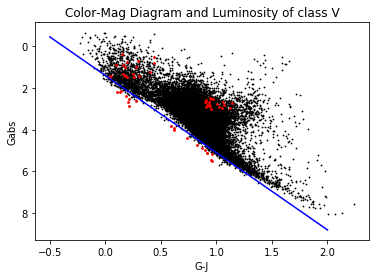

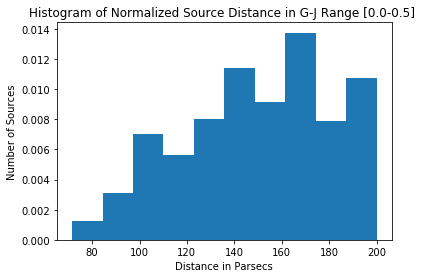

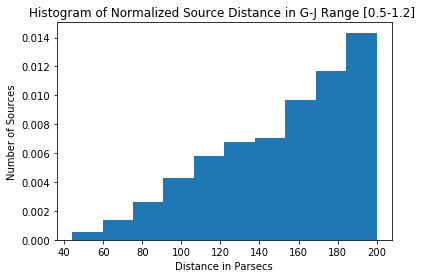

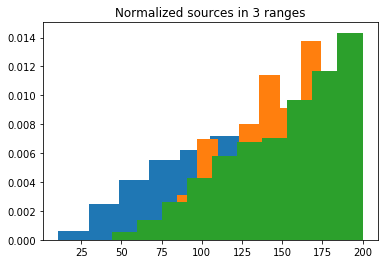

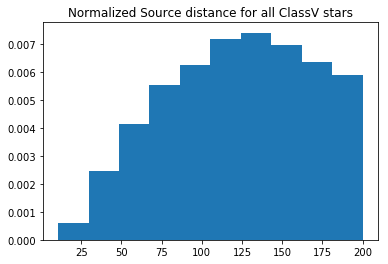

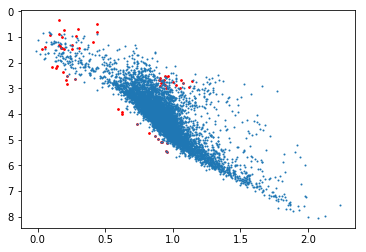

There are:  19641 Stars being used here


In [6]:
Teff = t['Teff']
RA = t['RAJ2000']
DEC = t['DEJ2000']
Gabs = []
GJabs = []
# First Region represents the G-J range of [0.0-0.5]
# Second Region represents the G-J range of [0.5-1.2]
# Each RA and DEC arrays correspond to each region based on the _"first" or _"second" notation
RA_first = []
DEC_first = []
temp_first = []
RA_second = []
DEC_second = []
temp_second = []
GJ1st = []
G1st = []
GJ2nd = []
G2nd = []
dist_1st = []
dist_2nd = []
# Arrays for sources below Main Sequence Line
RA_below = []
DEC_below = []
G_below = []
GJ_below = []
dist_below = []
temp_below = []
# Defines a rough estimate of the bottom of the Main Sequence Line. 
xrange = np.linspace(-0.5,2.0)
yvalue = xrange*3.7 +1.4
plt.plot(xrange,yvalue,c='b')
count = 0
all_dist = []
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            count = count + 1
            Gvalue = AbsGmag[i]
            GJvalue = AbsGmag[i]-AbsJmag[i]
            Gabs.append(Gvalue)
            GJabs.append(GJvalue)
            all_dist.append(dist[i])
            if(GJvalue >= 0.0 and GJvalue < 0.5):
                if(Gvalue >= 0.0 and Gvalue <= 1.5):
                    RA_first.append(RA[i])
                    DEC_first.append(DEC[i])
                    temp_first.append(Teff[i])
                    G1st.append(Gvalue)
                    GJ1st.append(GJvalue)
                    dist_1st.append(dist[i])
            if(0.9 <= GJvalue <= 1.2):
                if(2.5 <= Gvalue <= 3.0):
                    RA_second.append(RA[i])
                    DEC_second.append(DEC[i])
                    temp_second.append(Teff[i])
                    G2nd.append(Gvalue)
                    GJ2nd.append(GJvalue)
                    dist_2nd.append(dist[i])
            if(0.1 <= GJvalue <= 1.0):
                if(Gvalue > GJvalue*3.7+1.6):
                    RA_below.append(RA[i])
                    DEC_below.append(DEC[i])
                    G_below.append(Gvalue)
                    GJ_below.append(GJvalue)
                    dist_below.append(dist[i])
                    temp_below.append(Teff[i])
#              if(0.2 <= GJvalue <= 0.5):
#                  if(Gvalue/GJvalue < 3.7):
#                      RA_below.append(RA[i])
#                      DEC_below.append(DEC[i])
#                      G_below.append(Gvalue)
#                      GJ_below.append(GJvalue)
#                      dist_below.append(dist[i])
#                      temp_below.append(Teff[i])
                
plt.title('Color-Mag Diagram and Luminosity of class V')
plt.xlabel('G-J')
plt.ylabel('Gabs')
plt.gca().invert_yaxis()
plt.scatter(GJabs,Gabs,s=0.6,c='k')
meanTempFirst = np.mean(temp_first)
meanTempSecond = np.mean(temp_second)

Gabs100 = []
GJabs100 = []


print('Mean Effective Temperature in G-J Range 0.0-0.5: ', meanTempFirst, '\nNumber of Sources: ', len(RA_first), '\n')


print('Mean Effective Temperature in G-J Range 0.5-1.2: ', meanTempSecond, '\nNumber of Sources: ', len(RA_second), '\n')
print('     G-J [0.0-0.5]                           G-J [0.5-1.2]\n')
print('    RA                 DEC         DIST                 RA                DEC         DIST')

G_1st = []
GJ_1st = []
G_2nd = []
GJ_2nd = []
for j in range(0,20):
    
    print(RA_first[j], '   ',DEC_first[j], '   ',dist_1st[j], '        ',RA_second[j], '   ',DEC_second[j], '   ',dist_2nd[j])
    G_1st.append(G1st[j])
    GJ_1st.append(GJ1st[j])
    G_2nd.append(G2nd[j])
    GJ_2nd.append(GJ2nd[j])

print('\n \nAll Source below Theoretical Main Sequence Line (blue)\n')
print('    RA                 DEC         DIST')
for j in range(0,len(RA_below)):
    
    print(RA_below[j], '   ',DEC_below[j], '   ',dist_below[j])
#     G_1st.append(G1st[j])
#     GJ_1st.append(GJ1st[j])
#     G_2nd.append(G2nd[j])
#     GJ_2nd.append(GJ2nd[j])
plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')
plt.show()
    
plt.title('Histogram of Normalized Source Distance in G-J Range [0.0-0.5] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist1st=plt.hist(dist_1st,normed=True)
plt.show()
plt.title('Histogram of Normalized Source Distance in G-J Range [0.5-1.2] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist2nd=plt.hist(dist_2nd,normed=True)
plt.show()
plt.title('Normalized sources in 3 ranges')
histbelow=plt.hist(all_dist,normed=True)
hist1st=plt.hist(dist_1st,normed=True)
plt.hist(dist_2nd,normed=True)
#plt.legend('Class V','1st Region','2nd Region')
plt.show()
plt.title('Normalized Source distance for all ClassV stars')
plt.hist(all_dist,normed=True)
plt.show()

for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            if(dist[i] < 100):
                Gvalue = AbsGmag[i]
                GJvalue = AbsGmag[i]-AbsJmag[i]
                Gabs100.append(Gvalue)
                GJabs100.append(GJvalue)

plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')
plt.scatter(GJabs100,Gabs100,s=1.0)
plt.gca().invert_yaxis()
plt.show()
print('There are: ',count, 'Stars being used here')

In [8]:
# Splits all stars into 13 different temperature subgroups. 

Teff = t['Teff']
temps = [4000.0,4500.0,5000.0,5500.0,6000.0,6500.0,7000.0,7500.0,8000.0,8500.0,9000.0,9500.0,10000.0]
totalRelB_temp = ([])
totalRelV_temp = ([])
totalRelK_temp = ([])
totalRelH_temp = ([])
totalRelJ_temp = ([])
totalRelG_temp = ([])
Bstd_temp = []
Vstd_temp = []
Kstd_temp = []
Hstd_temp = []
Jstd_temp = []
Gstd_temp = []
all_diffB_temp = [] 
for i in temps:
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    BmagV = []
    diffB_temp = []
    for j in range(0,len(Teff)):
        if(SpTypeN[j] in SpV):
            if(i <= Teff[j] <= i+500):
                tempRange.append(Teff[j])
                if(Gmag.mask[j] == False):
                    GmagV.append(AbsGmag[j]-AbsGmag[j])
                if(Vmag.mask[j] == False and Gmag.mask[j] == False):
                    VmagV.append(AbsGmag[j]-AbsVmag[j])
                if(Kmag.mask[j] == False and Gmag.mask[j] == False):
                    KmagV.append(AbsGmag[j]-AbsKmag[j])
                if(Hmag.mask[j] == False and Gmag.mask[j] == False):
                    HmagV.append(AbsGmag[j]-AbsHmag[j])
                if(Jmag.mask[j] == False and Gmag.mask[j] == False):
                    JmagV.append(AbsGmag[j]-AbsJmag[j])
                if(Bmag.mask[j] == False and Gmag.mask[j] == False):
                    BmagV.append(AbsGmag[j]-AbsBmag[j])
                    
                sources = sources + 1
    
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    MeanBmag = np.mean(BmagV)
    
    Bstd_temp.append(np.nanstd(BmagV))
    Vstd_temp.append(np.nanstd(VmagV))
    Hstd_temp.append(np.nanstd(HmagV))
    Jstd_temp.append(np.nanstd(JmagV))
    Kstd_temp.append(np.nanstd(KmagV))
    Gstd_temp.append(np.nanstd(GmagV))
    totalRelB_temp.append(MeanBmag)
    totalRelG_temp.append(MeanGmag)
    totalRelV_temp.append(MeanVmag)
    totalRelH_temp.append(MeanHmag)
    totalRelK_temp.append(MeanKmag)
    totalRelJ_temp.append(MeanJmag)
    #print(MeanBmag)
    Mags = [MeanBmag,MeanVmag,MeanJmag,MeanHmag,MeanKmag]
    print(i,' - ',i+500,' Range Completed')
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
    #plt.xlabel('Effective Wavelength')
#     plt.ylabel('Absolute Magnitude')
#     plt.title('Relative Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
#     plt.scatter(EffWave,Mags)
#     plt.gca().invert_yaxis()
#     plt.show()
print('Finished')

4000.0  -  4500.0  Range Completed
4500.0  -  5000.0  Range Completed
5000.0  -  5500.0  Range Completed
5500.0  -  6000.0  Range Completed
6000.0  -  6500.0  Range Completed
6500.0  -  7000.0  Range Completed
7000.0  -  7500.0  Range Completed
7500.0  -  8000.0  Range Completed
8000.0  -  8500.0  Range Completed
8500.0  -  9000.0  Range Completed
9000.0  -  9500.0  Range Completed
9500.0  -  10000.0  Range Completed
10000.0  -  10500.0  Range Completed
Finished


In [13]:
print((3.25+0.3)/13)

0.27307692307692305
3.0038461538461536e+17


In [9]:
# The following code calculates the Chi Squared for every star based off of the temperature subgroup. 

ChiVal = []

def ChiSq(theory,data,Uncert):
    value = ((theory-data)/Uncert)**(2.0)
    return value
All_Chi_Values = []
Chi_minB = []
Chi_minV = []
Chi_minH = []
Chi_minK = []
Chi_minJ = []
finalB = []
finalV = []
finalJ = []
finalK = []
finalH = []
BestFit_temp = []
for i in range(0,len(Teff)):
    #if(SpTypeN[i] in SpV and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False and Bmag.mask[i] == False):
    Chivalues = []
    ChiB = ([])
    ChiV = ([])
    ChiH = ([])
    ChiK = ([])
    ChiJ = ([])
    ChiB_np = np.array([])
    ChiV_np = np.array([])
    ChiH_np = np.array([])
    ChiK_np = np.array([])
    ChiJ_np = np.array([])
    RedChi = []
    for j in range(len(temps)):

#             if(Gmag.mask[i] == False):
#                 data = (AbsGmag[i]-AbsGmag[i])
#                 Chivalues.append(MeanGmag,data)
        if(Vmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsVmag[i])
            currentV = ChiSq(totalRelV_temp[j],data,Vstd_temp[j])
            
#             ChiV.append([currentV,totalTemp[j]])
#             np.append(ChiV_np,ChiV)
        if(Kmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsKmag[i])
            currentK = ChiSq(totalRelK_temp[j],data,Kstd_temp[j])
#             ChiK.append([currentK,totalTemp[j]])
#             np.append(ChiK_np,ChiK)
        if(Hmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsHmag[i])
            currentH = ChiSq(totalRelH_temp[j],data,Hstd_temp[j])
#             ChiH.append([currentH,totalTemp[j]])
#             np.append(ChiH_np,ChiH)
        if(Jmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsJmag[i])
            currentJ = (ChiSq(totalRelJ_temp[j],data,Jstd_temp[j]))
#             ChiJ.append([currentJ,totalTemp[j]])
#             np.append(ChiJ_np,ChiJ)
        if(Bmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsBmag[i])
            currentB = (ChiSq(totalRelB_temp[j],data,Bstd_temp[j]))
#             ChiB.append([currentB,totalTemp[j]])
#             np.append(ChiB_np,ChiB)
        RedChi.append([(currentV+currentK+currentH+currentJ+currentB)/4,totalTemp[j]])
    RedChi = np.array(RedChi)
    Min = np.min(RedChi[:,0])
    for x in range(len(RedChi)):
        if(Min in RedChi[x]):
            bestTemp = RedChi[x,1]
    BestFit_temp.append([Min,bestTemp])
print('Finished fitting all stars to the ',len(temps), ' templates based off of the temperature subgroups')

Finished fitting all stars to the  13  templates based off of the temperature subgroups


Mean Effective Temperature in G-J Range 0.0-0.5:  9385.89085072 
Number of Sources:  623 

Mean Effective Temperature in G-J Range 0.5-1.2:  6223.22580645 
Number of Sources:  465 

     G-J [0.0-0.5]                           G-J [0.5-1.2]

    RA                 DEC         DIST      ReducedChisq               RA                DEC         DIST      RedChiSQ
271.16212372     -41.97017167     172.712     0.0238899600423          238.30027959     -7.65534154     145.773     0.590442944673
93.2465281     -28.46361115     150.15     0.121010889656          77.88766668     -3.59936093     182.482     1.00746606536
48.75113318     -26.10046057     151.057     0.00791056045547          234.06460186     -7.71727492     174.52     0.270716039915
45.2229946     52.35204252     147.71     27.6892861906          280.46668795     -39.67516865     119.332     0.164043639846
273.55307709     -39.94978747     191.205     0.0120448478935          231.77763686     -40.37868703     186.567     0.172026

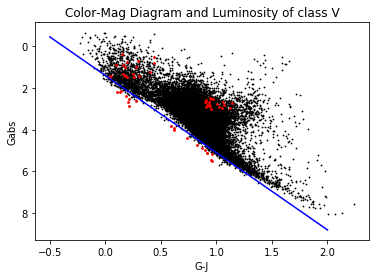

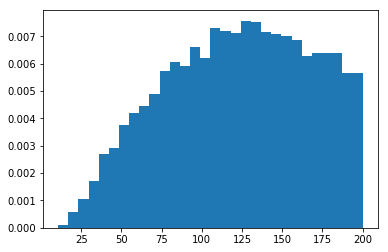

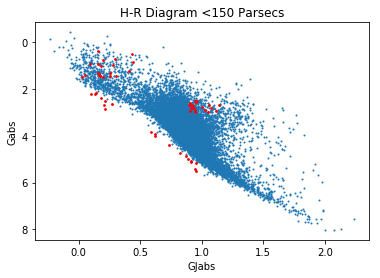

There are:  19641 Stars being used here


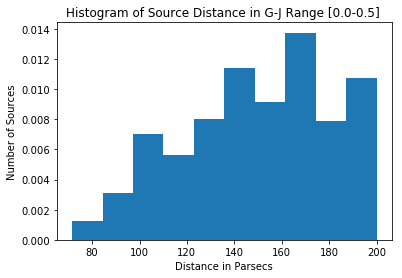

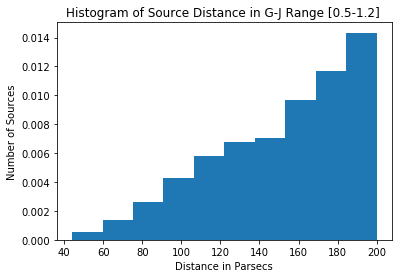

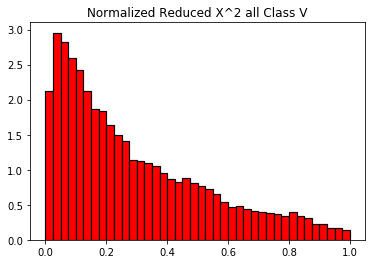

Mean Reduced X^2 value:  0.377443505225 
Standard Deviation:  0.76619266616
Number of Sources:  19641


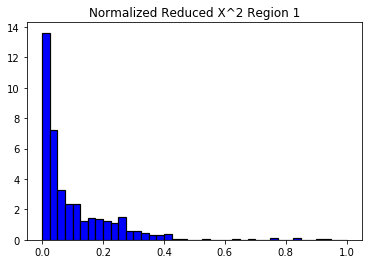

Mean Reduced X^2 value:  0.16363086355 
Standard Deviation:  1.13296567361
Number of Sources:  623 



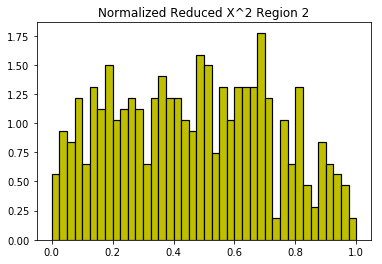

Mean Reduced X^2 value:  0.665072957238 
Standard Deviation:  1.21042669846
Number of Sources:  465 



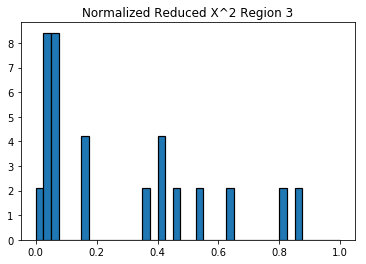

Mean Reduced X^2 value:  0.396550540993 
Standrd Deviation:  0.586163609134
Number of Sources:  20


C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


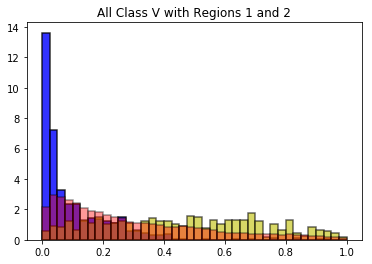

In [8]:
RA = t['RAJ2000']
DEC = t['DEJ2000']
Gabs = []
GJabs = []
# First Region represents the G-J range of [0.0-0.5]
# Second Region represents the G-J range of [0.5-1.2]
# Each RA and DEC arrays correspond to each region based on the _"first" or _"second" notation
RA_first = []
DEC_first = []
temp_first = []
RA_second = []
DEC_second = []
temp_second = []
GJ1st = []
G1st = []
GJ2nd = []
G2nd = []
dist_1st = []
dist_2nd = []
# Arrays for sources below Main Sequence Line
RA_below = []
DEC_below = []
G_below = []
GJ_below = []
dist_below = []
temp_below = []
ClassVChi = []
Chi1st = []
Chi2nd = []
ChiBelow = []
nanChi = []
# Defines a rough estimate of the bottom of the Main Sequence Line. 
xrange = np.linspace(-0.5,2.0)
yvalue = xrange*3.7 +1.4
plt.plot(xrange,yvalue,c='b')
count = 0
all_dists = []
region1count = 0
region2count = 0
totalcount = 0
Tdiff = []
BestFit_temp = np.array(BestFit_temp)
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            count = count + 1
            Gvalue = AbsGmag[i]
            GJvalue = AbsGmag[i]-AbsJmag[i]
            Gabs.append(Gvalue)
            GJabs.append(GJvalue)
            all_dists.append(dist[i])
            totalcount = totalcount + 1
            ClassVChi.append(BestFit_temp[i,0])
            Tdiff.append(np.sqrt((Teff[i]-BestFit_temp[i,1])**2.0))
            if(GJvalue >= 0.0 and GJvalue < 0.5):
                if(Gvalue >= 0.0 and Gvalue <= 1.5):
                    RA_first.append(RA[i])
                    DEC_first.append(DEC[i])
                    temp_first.append(Teff[i])
                    G1st.append(Gvalue)
                    GJ1st.append(GJvalue)
                    dist_1st.append(dist[i])
                    Chi1st.append(BestFit_temp[i,0])
                    if(str(BestFit_temp[i,0]) == 'nan'):
                        print('Got one')
                    region1count = region1count + 1
                    
            if(0.9 <= GJvalue <= 1.2):
                if(2.5 <= Gvalue <= 3.0):
                    RA_second.append(RA[i])
                    DEC_second.append(DEC[i])
                    temp_second.append(Teff[i])
                    G2nd.append(Gvalue)
                    GJ2nd.append(GJvalue)
                    dist_2nd.append(dist[i])
                    Chi2nd.append(BestFit_temp[i,0])
                    region2count = region2count + 1
            if(0.1 <= GJvalue <= 1.0):
                if(Gvalue > GJvalue*3.7+1.6):
                    RA_below.append(RA[i])
                    DEC_below.append(DEC[i])
                    G_below.append(Gvalue)
                    GJ_below.append(GJvalue)
                    dist_below.append(dist[i])
                    temp_below.append(Teff[i])
                    ChiBelow.append(BestFit_temp[i,0])
            #else:
                #nanChi.append(all_RedChi[i])
#              if(0.2 <= GJvalue <= 0.5):
#                  if(Gvalue/GJvalue < 3.7):
#                      RA_below.append(RA[i])
#                      DEC_below.append(DEC[i])
#                      G_below.append(Gvalue)
#                      GJ_below.append(GJvalue)
#                      dist_below.append(dist[i])
#                      temp_below.append(Teff[i])
                
plt.title('Color-Mag Diagram and Luminosity of class V')
plt.xlabel('G-J')
plt.ylabel('Gabs')
plt.gca().invert_yaxis()
plt.scatter(GJabs,Gabs,s=0.6,c='k')
meanTempFirst = np.mean(temp_first)
meanTempSecond = np.mean(temp_second)

Gabs100 = []
GJabs100 = []
GChi = []
GJChi = []

print('Mean Effective Temperature in G-J Range 0.0-0.5: ', meanTempFirst, '\nNumber of Sources: ', len(RA_first), '\n')


print('Mean Effective Temperature in G-J Range 0.5-1.2: ', meanTempSecond, '\nNumber of Sources: ', len(RA_second), '\n')
print('     G-J [0.0-0.5]                           G-J [0.5-1.2]\n')
print('    RA                 DEC         DIST      ReducedChisq               RA                DEC         DIST      RedChiSQ')

G_1st = []
GJ_1st = []
dist1 = []
G_2nd = []
GJ_2nd = []
dist2 = []
for j in range(0,20):
    
    print(RA_first[j], '   ',DEC_first[j], '   ',dist_1st[j],'   ',Chi1st[j], '        ',RA_second[j], '   ',DEC_second[j], '   ',dist_2nd[j],'   ',Chi2nd[j])
    G_1st.append(G1st[j])
    GJ_1st.append(GJ1st[j])
    G_2nd.append(G2nd[j])
    GJ_2nd.append(GJ2nd[j])
    dist1.append(dist_1st[j])
    dist2.append(dist_2nd[j])
distBelow = []
print('\n \nAll Source below Theoretical Main Sequence Line (blue)\n')
print('    RA                 DEC         DIST      Reduced ChiSq')
for j in range(0,len(RA_below)):
    
    print(RA_below[j], '   ',DEC_below[j], '   ',dist_below[j],'   ',ChiBelow[j])
    distBelow.append(dist_below[j])
#     G_1st.append(G1st[j])
#     GJ_1st.append(GJ1st[j])
#     G_2nd.append(G2nd[j])
#     GJ_2nd.append(GJ2nd[j])
plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')
plt.show()


classV = []
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            classV.append(dist[i])
pltall=plt.hist(classV,bins=30,normed=True)
plt.show()
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            if(dist[i] < 150.0):
                Gvalue = AbsGmag[i]
                GJvalue = AbsGmag[i]-AbsJmag[i]
                Gabs100.append(Gvalue)
                GJabs100.append(GJvalue)
                
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            if(BestFit_temp[i,0] < 0.5):
                Gvalue = AbsGmag[i]
                GJvalue = AbsGmag[i]-AbsJmag[i]
                GChi.append(Gvalue)
                GJChi.append(GJvalue)

# plt.title('Red X^2')
# plt.scatter(GJChi,GChi,s=2.0)
# plt.gca().invert_yaxis()
# plt.show()

plt.title('H-R Diagram <150 Parsecs')
plt.xlabel('GJabs')
plt.ylabel('Gabs')
plt.scatter(GJabs100,Gabs100,s=1.0)
plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')

plt.gca().invert_yaxis()
plt.show()
G_Chi = []
GJ_Chi = []
print('There are: ',count, 'Stars being used here')
#print(len(all_RedChi))
averageRedChi = []

# plt.title('H-R With Reduced Chi Sq <10.0')
# plt.xlabel('GJabs')
# plt.ylabel('Gabs')
# plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
# plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
# plt.scatter(GJ_below,G_below,s=3.0,c='r')
# plt.scatter(GJ_Chi,G_Chi,s=2.0)
# plt.gca().invert_yaxis()
# plt.show()

plt.title('Histogram of Source Distance in G-J Range [0.0-0.5] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist1st=plt.hist(dist_1st,normed=True)
plt.show()
plt.title('Histogram of Source Distance in G-J Range [0.5-1.2] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist2nd=plt.hist(dist_2nd,normed=True)
plt.show()

# Reduced X^2 Normalized Histograms
plt.title('Normalized Reduced X^2 all Class V')
plt.hist(ClassVChi,bins=40,range=[0,1],normed=True,color='r',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(ClassVChi),'\nStandard Deviation: ',np.std(ClassVChi))
print('Number of Sources: ', count)
plt.title('Normalized Reduced X^2 Region 1')
plt.hist(Chi1st,bins=40,range=[0,1],normed=True,color='b',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(Chi1st),'\nStandard Deviation: ',np.std(Chi1st))
print('Number of Sources: ', len(RA_first), '\n')
plt.title('Normalized Reduced X^2 Region 2')
plt.hist(Chi2nd,bins=40,range=[0,1],normed=True,color='y',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(Chi2nd),'\nStandard Deviation: ',np.std(Chi2nd))
print('Number of Sources: ', len(RA_second), '\n')
plt.title('Normalized Reduced X^2 Region 3')
plt.hist(ChiBelow,bins=40,range=[0,1],normed=True,edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(ChiBelow),'\nStandrd Deviation: ',np.std(ChiBelow))
print('Number of Sources: ', len(RA_below))
#print(stats.mode(ClassVChi))
plt.title('All Class V with Regions 1 and 2')

plt.hist(Chi1st,bins=40,range=[0,1],normed=True,edgecolor='black',linewidth=1.5,alpha=0.8,color='b')
plt.hist(Chi2nd,bins=40,range=[0,1],normed=True,edgecolor='black',linewidth=1.5,alpha=0.6,color='y')
plt.hist(ClassVChi,bins=40,range=[0,1],normed=True,edgecolor='black',linewidth=1.5,alpha=0.4,color='r')
plt.legend(loc='upper right')
plt.show()

In [56]:
# This Seperates Every Star into color subcategories. The color in question is G-K. 

Teff = t['Teff']
#Mags = [-0.3,-0.05,0.2,0.45,0.7,0.95,1.2,1.45,1.7,1.95,2.2,2.45,2.7,2.95]
Mags = [-0.3,-0.02692307692307694,0.2461538461538461,0.5192307692307692,0.7923076923076922,
        1.0653846153846152,1.3384615384615381,1.6115384615384611,1.8846153846153841,
        2.157692307692307,2.43076923076923,2.703846153846153,2.976923076923076]
totalRelB = ([])
totalRelV = ([])
totalRelK = ([])
totalRelH = ([])
totalRelJ = ([])
totalRelG = ([])
Bstd = []
Vstd = []
Kstd = []
Hstd = []
Jstd = []
Gstd = []
GKvals = []
all_diffB = []
all_diffB_std = []
for i in Mags:
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    BmagV = []
    diffB = []
    for j in range(0,len(Teff)):
        if(SpTypeN[j] in SpV):
            GK = (AbsGmag[j]-AbsKmag[j])
            GKvals.append(GK)
            if(i <= GK < i + 0.27307692307692305):
            #if(i <= GK < i+0.25):
                #magRange.append(GK)
                if(Gmag.mask[j] == False):
                    GmagV.append(AbsGmag[j]-AbsGmag[j])
                if(Vmag.mask[j] == False and Gmag.mask[j] == False):
                    VmagV.append(AbsGmag[j]-AbsVmag[j])
                if(Kmag.mask[j] == False and Gmag.mask[j] == False):
                    KmagV.append(AbsGmag[j]-AbsKmag[j])
                if(Hmag.mask[j] == False and Gmag.mask[j] == False):
                    HmagV.append(AbsGmag[j]-AbsHmag[j])
                if(Jmag.mask[j] == False and Gmag.mask[j] == False):
                    JmagV.append(AbsGmag[j]-AbsJmag[j])
                if(Bmag.mask[j] == False and Gmag.mask[j] == False):
                    BmagV.append(AbsGmag[j]-AbsBmag[j])
                    diffB.append(AbsGmag[j]-AbsBmag[j])
                sources = sources + 1
    
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    MeanBmag = np.mean(BmagV)
    all_diffB.append(np.mean(diffB))
    all_diffB_std.append(np.std(diffB))
    Bstd.append(np.nanstd(BmagV))
    Vstd.append(np.nanstd(VmagV))
    Hstd.append(np.nanstd(HmagV))
    Jstd.append(np.nanstd(JmagV))
    Kstd.append(np.nanstd(KmagV))
    Gstd.append(np.nanstd(GmagV))
    totalRelB.append(MeanBmag)
    totalRelG.append(MeanGmag)
    totalRelV.append(MeanVmag)
    totalRelH.append(MeanHmag)
    totalRelK.append(MeanKmag)
    totalRelJ.append(MeanJmag)
    #print(MeanBmag)
    #Mean_Mags = [MeanBmag,MeanVmag,MeanJmag,MeanHmag,MeanKmag]
    print(i,'-',i+.27307692307692305,' Range Completed')
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
    #plt.xlabel('Effective Wavelength')
#     plt.ylabel('Absolute Magnitude')
#     plt.title('Relative Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
#     plt.scatter(EffWave,Mags)
#     plt.gca().invert_yaxis()
#     plt.show()
print('Finished all',len(Mags),'Templates')

-0.3 - -0.02692307692307694  Range Completed
-0.02692307692307694 - 0.2461538461538461  Range Completed
0.2461538461538461 - 0.5192307692307692  Range Completed
0.5192307692307692 - 0.7923076923076922  Range Completed
0.7923076923076922 - 1.0653846153846152  Range Completed
1.0653846153846152 - 1.3384615384615381  Range Completed
1.3384615384615381 - 1.6115384615384611  Range Completed
1.6115384615384611 - 1.8846153846153841  Range Completed
1.8846153846153841 - 2.157692307692307  Range Completed
2.157692307692307 - 2.43076923076923  Range Completed
2.43076923076923 - 2.703846153846153  Range Completed
2.703846153846153 - 2.976923076923076  Range Completed
2.976923076923076 - 3.249999999999999  Range Completed
Finished all 13 Templates


In [9]:
print('Mean STD for Temp subgroups          Mean STD for color subgroups')
print('Bmag: ',np.mean(Bstd_temp),'                   ',np.mean(Bstd))
print('Vmag: ',np.mean(Vstd_temp),'                   ',np.mean(Vstd))
print('Jmag: ',np.mean(Jstd_temp),'                   ',np.mean(Jstd))
print('Hmag: ',np.mean(Hstd_temp),'                   ',np.mean(Hstd))
print('Kmag: ',np.mean(Kstd_temp),'                   ',np.mean(Kstd))
    
print('\nStanDev of STD for Temp subgroups          StanDev of STD for color subgroups')
print('Bmag: ',np.std(Bstd_temp),'                   ',np.std(Bstd))
print('Vmag: ',np.std(Vstd_temp),'                   ',np.std(Vstd))
print('Jmag: ',np.std(Jstd_temp),'                   ',np.std(Jstd))
print('Hmag: ',np.std(Hstd_temp),'                   ',np.std(Hstd))
print('Kmag: ',np.std(Kstd_temp),'                   ',np.std(Kstd))

print('\nMean of G-B: ',np.std(all_diffB),'\nStandard Deviation of G-B: ',np.std(all_diffB_std) )

Mean STD for Temp subgroups          Mean STD for color subgroups
Bmag:  0.164974109599                     0.220722349561
Vmag:  0.0810425476924                     0.105768607559
Jmag:  0.15172873275                     0.0855961813677
Hmag:  0.196984838223                     0.0909650359301
Kmag:  0.213726827407                     0.0724623807518

StanDev of STD for Temp subgroups          StanDev of STD for color subgroups
Bmag:  0.074305855267                     0.22326999183
Vmag:  0.0400539593614                     0.0873549618058
Jmag:  0.0427125307713                     0.0532561369697
Hmag:  0.0559595253291                     0.0424305110411
Kmag:  0.0672740757076                     0.00737106176617

Mean of G-B:  0.845026766401 
Standard Deviation of G-B:  0.22326999183


C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


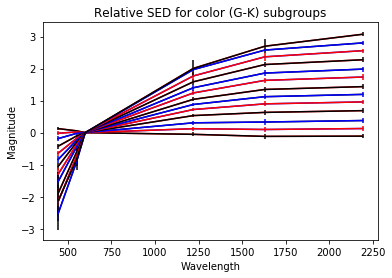

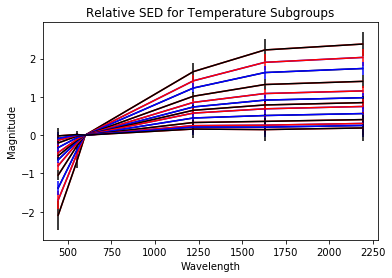

In [10]:
from matplotlib.pyplot import *
## Color (G-K) Subgroups
totalRelMags = np.array([totalRelB,totalRelV,totalRelG,totalRelJ,totalRelH,totalRelK])
totalStdMags = np.array([Bstd,Vstd,Gstd,Jstd,Hstd,Kstd])
fig, ax = plt.subplots()
ax.set_color_cycle(['red', 'black', 'blue'])
#plt.scatter(totalMags[0][0:])
for i in range(len(Mags)):
    plt.plot(EffWave,totalRelMags[:,i])
    plt.errorbar(EffWave,totalRelMags[:,i],totalStdMags[:,i])
    #plt.legend(["Mean Temp: "], [totalTemp[i]])
plt.title('Relative SED for color (G-K) subgroups') 
plt.xlabel('Wavelength')
plt.ylabel('Magnitude')
plt.show()

## For Temperature Subgroups
totalRelMags_temp = np.array([totalRelB_temp,totalRelV_temp,totalRelG_temp,totalRelJ_temp,totalRelH_temp,totalRelK_temp])
totalStdMags_temp = np.array([Bstd_temp,Vstd_temp,Gstd_temp,Jstd_temp,Hstd_temp,Kstd_temp])
fig, ax = plt.subplots()
ax.set_color_cycle(['red', 'black', 'blue'])
for i in range(len(temps)):
    plt.plot(EffWave,totalRelMags_temp[:,i])
    plt.errorbar(EffWave,totalRelMags_temp[:,i],totalStdMags_temp[:,i])
    #plt.legend(["Mean Temp: "], [totalTemp[i]])
plt.title('Relative SED for Temperature Subgroups') 
plt.xlabel('Wavelength')
plt.ylabel('Magnitude')
plt.show()


In [25]:
totalStdMags

array([[ 0.1252051 , -0.02027337, -0.18615804, -0.42360888, -0.64283569,
        -0.83753494, -1.05305651, -1.29597393, -1.52589681, -1.89291151,
        -2.15186961, -2.52355565, -2.13300006],
       [ 0.05666667,  0.02260793, -0.0218154 , -0.1029961 , -0.17739776,
        -0.23545147, -0.2983951 , -0.37638184, -0.44553378, -0.60326548,
        -0.73415219, -0.9003333 , -0.83066686],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.05297435,  0.12342089,  0.30671189,  0.53253439,  0.72160763,
         0.87892444,  1.04010154,  1.23917661,  1.40169395,  1.58733626,
         1.7696739 ,  1.96888892,  2.00533311],
       [-0.11666667,  0.09810613,  0.33152727,  0.63214425,  0.89855062,
         1.12253915,  1.34844418,  1.63150786,  1.85984643,  2.12641283,
         2.36693331,  2.5775556 ,  2.6979998 ],
       [-0.10942308,  0.128368

In [11]:
# Calculates the Chi squared value for every star based off of the color subgroups. 
ChiVal = []

def ChiSq(theory,data,Uncert):
    value = ((theory-data)/Uncert)**(2.0)
    return value
All_Chi_Values = []
Chi_minB = []
Chi_minV = []
Chi_minH = []
Chi_minK = []
Chi_minJ = []
finalB = []
finalV = []
finalJ = []
finalK = []
finalH = []
BestFit = []
for i in range(0,len(Teff)):
    #if(SpTypeN[i] in SpV and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False and Bmag.mask[i] == False):
    Chivalues = []
    ChiB = ([])
    ChiV = ([])
    ChiH = ([])
    ChiK = ([])
    ChiJ = ([])
    ChiB_np = np.array([])
    ChiV_np = np.array([])
    ChiH_np = np.array([])
    ChiK_np = np.array([])
    ChiJ_np = np.array([])
    RedChi = []
    for j in range(len(Mags)):

#             if(Gmag.mask[i] == False):
#                 data = (AbsGmag[i]-AbsGmag[i])
#                 Chivalues.append(MeanGmag,data)
        if(Vmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsVmag[i])
            currentV = ChiSq(totalRelV[j],data,Vstd[j])
            
#             ChiV.append([currentV,totalTemp[j]])
#             np.append(ChiV_np,ChiV)
        if(Kmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsKmag[i])
            currentK = ChiSq(totalRelK[j],data,Kstd[j])
#             ChiK.append([currentK,totalTemp[j]])
#             np.append(ChiK_np,ChiK)
        if(Hmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsHmag[i])
            currentH = ChiSq(totalRelH[j],data,Hstd[j])
#             ChiH.append([currentH,totalTemp[j]])
#             np.append(ChiH_np,ChiH)
        if(Jmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsJmag[i])
            currentJ = (ChiSq(totalRelJ[j],data,Jstd[j]))
#             ChiJ.append([currentJ,totalTemp[j]])
#             np.append(ChiJ_np,ChiJ)
        if(Bmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsBmag[i])
            currentB = (ChiSq(totalRelB[j],data,Bstd[j]))
#             ChiB.append([currentB,totalTemp[j]])
#             np.append(ChiB_np,ChiB)
        RedChi.append([(currentV+currentK+currentH+currentJ+currentB)/4,totalRelK[j]])
    RedChi = np.array(RedChi)
    Min = np.min(RedChi[:,0])
    for x in range(len(RedChi)):
        if(Min in RedChi[x]):
            bestMag = RedChi[x,1]
    BestFit.append([Min,bestMag])
    #print(len(ChiV),len(ChiH))
    #InferredTemp = []
#     ChiV_np = np.array(ChiV)
#     ChiH_np = np.array(ChiH)
#     ChiJ_np = np.array(ChiJ)
#     ChiK_np = np.array(ChiK)
#     ChiB_np = np.array(ChiB)
    
#     if(len(ChiB) == 0):
#         finalB.append('nan')
#     else:
#          #Chi_minB.append(np.min(ChiB_np[:,0]))
#         for x in range(0,len(ChiB_np)):
#              if(np.min(ChiB_np[:,0]) in ChiB_np[x]):
#                     finalB.append(ChiB_np[x])
    
#     if(len(ChiV) == 0):
#         finalV.append('nan')
#     else:
#         for x in range(0,len(ChiV_np)):
#              if(np.min(ChiV_np[:,0]) in ChiV_np[x]):
#                     finalV.append(ChiV_np[x])
#     if(len(ChiH) == 0):
#         finalH.append('nan')
#     else:
#         for x in range(0,len(ChiH_np)):
#              if(np.min(ChiH_np[:,0]) in ChiH_np[x]):
#                     finalH.append(ChiH_np[x])
#     if(len(ChiJ) == 0):
#         finalJ.append('nan')
#     else:
#         for x in range(0,len(ChiJ_np)):
#              if(np.min(ChiJ_np[:,0]) in ChiJ_np[x]):
#                     finalJ.append(ChiJ_np[x])
#     if(len(ChiK) == 0):
#         finalK.append('nan')
#     else:
#         for x in range(0,len(ChiK_np)):
#              if(np.min(ChiK_np[:,0]) in ChiK_np[x]):
#                     finalK.append(ChiK_np[x])

        
print('All Stars have been matched to one of the 13 templates')
        

All Stars have been matched to one of the 13 templates


In [40]:
print(Kstd,'\n')
print(totalRelK,'\n\n')
print(BestFit[2])
print(AbsGmag[2]-AbsKmag[2])
print(np.min(BestFit[:,0]))

[0.064004415263816228, 0.066035631611639015, 0.06985972776623714, 0.075769455890478454, 0.067152344111173351, 0.069425729441040779, 0.068623830836428298, 0.070879159794859356, 0.069145540056030769, 0.075919735029548477, 0.069795970161845911, 0.065394063781279932, 0.054725626412895426, 0.06362554216609323] 

[-0.1292950598919978, 0.099615556374996833, 0.32128570316741184, 0.58520147489464802, 0.85715048013388306, 1.0836735008386826, 1.3070175486740065, 1.5474915420386957, 1.8154659487606135, 2.0491746190994506, 2.2991111066606309, 2.5582173596257749, 2.800333340962728, 3.070666472117106] 


[ 1.50932005  0.3212857 ]
0.261000156403
0.00261899696292


12.3952605993
56.1883321601 708.620469077
12.3952605993


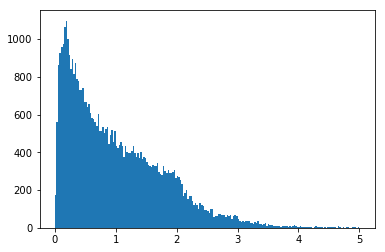

In [13]:

BestFit = np.array(BestFit)
print(np.mean(BestFit[:,0]))
print(np.std(BestFit[:,0]),np.max(BestFit[:,0]))

#for i in range(len(BestFit[:,0])): 
#print(BestFit[2,0])
BestFit = np.array(BestFit)
#BestFit[0:1000,0]
print(np.mean(BestFit[:,0]))
plt.hist(BestFit[:,0],bins=200,range=[0,5])
plt.show()


In [20]:
print(len(finalB))

50093


Mean Effective Temperature in G-J Range 0.0-0.5:  9385.89085072 
Number of Sources:  623 

Mean Effective Temperature in G-J Range 0.5-1.2:  6223.22580645 
Number of Sources:  465 

     G-J [0.0-0.5]                           G-J [0.5-1.2]

    RA                 DEC         DIST      ReducedChisq               RA                DEC         DIST      RedChiSQ
271.16212372     -41.97017167     172.712     1.53703298981          238.30027959     -7.65534154     145.773     0.69926956717
93.2465281     -28.46361115     150.15     0.695333175759          77.88766668     -3.59936093     182.482     0.6772932493
48.75113318     -26.10046057     151.057     0.521362178871          234.06460186     -7.71727492     174.52     0.961308627029
45.2229946     52.35204252     147.71     136.094497704          280.46668795     -39.67516865     119.332     0.218553784088
273.55307709     -39.94978747     191.205     1.01761156472          231.77763686     -40.37868703     186.567     0.201133641861
5

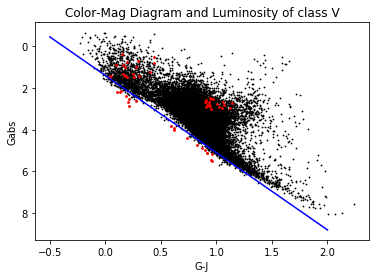

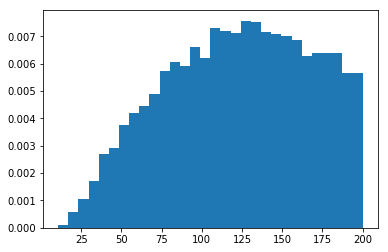

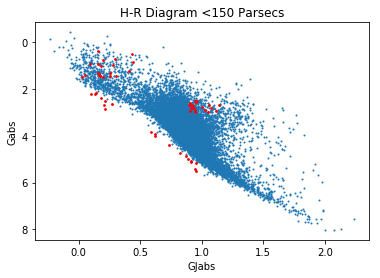

There are:  19641 Stars being used here


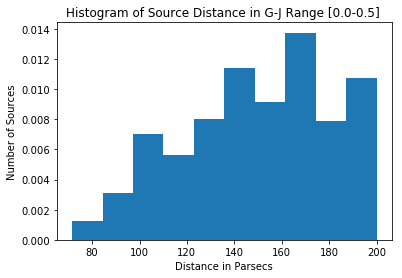

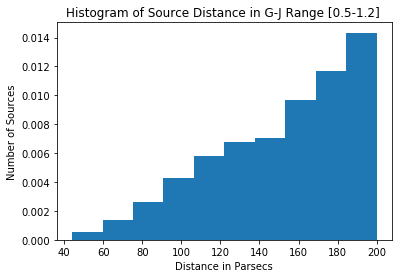

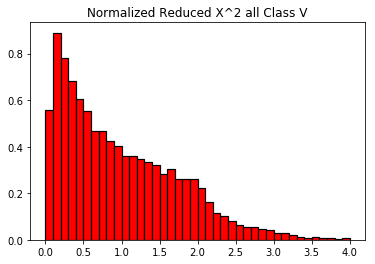

Mean Reduced X^2 value:  1.06249544986 
Standard Deviation:  1.66983243613
Number of Sources:  19641


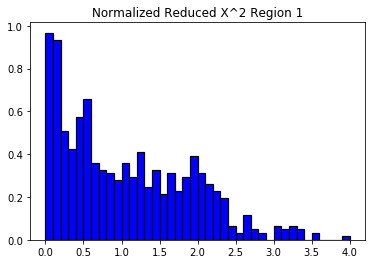

Mean Reduced X^2 value:  1.42927520931 
Standard Deviation:  5.65782313524
Number of Sources:  623 



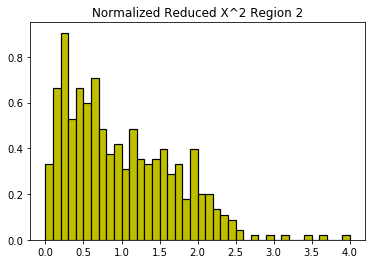

Mean Reduced X^2 value:  1.35224134403 
Standard Deviation:  3.52405334302
Number of Sources:  465 



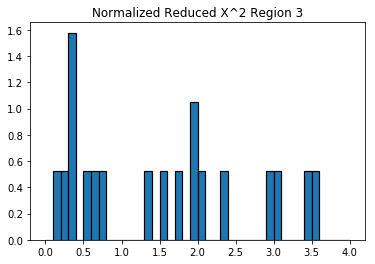

Mean Reduced X^2 value:  1.83628248281 
Standrd Deviation:  1.65386978369
Number of Sources:  20


C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


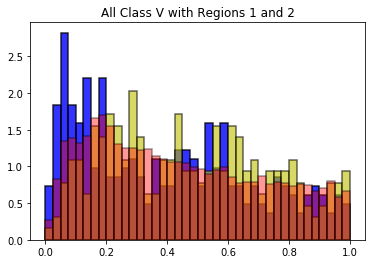

In [14]:
from scipy import stats
RA = t['RAJ2000']
DEC = t['DEJ2000']
Gabs = []
GJabs = []
# First Region represents the G-J range of [0.0-0.5]
# Second Region represents the G-J range of [0.5-1.2]
# Each RA and DEC arrays correspond to each region based on the _"first" or _"second" notation
RA_first = []
DEC_first = []
temp_first = []
RA_second = []
DEC_second = []
temp_second = []
GJ1st = []
G1st = []
GJ2nd = []
G2nd = []
dist_1st = []
dist_2nd = []
# Arrays for sources below Main Sequence Line
RA_below = []
DEC_below = []
G_below = []
GJ_below = []
dist_below = []
temp_below = []
ClassVChi = []
Chi1st = []
Chi2nd = []
ChiBelow = []
nanChi = []
# Defines a rough estimate of the bottom of the Main Sequence Line. 
xrange = np.linspace(-0.5,2.0)
yvalue = xrange*3.7 +1.4
plt.plot(xrange,yvalue,c='b')
count = 0
all_dists = []
region1count = 0
region2count = 0
totalcount = 0
Tdiff = []
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            count = count + 1
            Gvalue = AbsGmag[i]
            GJvalue = AbsGmag[i]-AbsJmag[i]
            Gabs.append(Gvalue)
            GJabs.append(GJvalue)
            all_dists.append(dist[i])
            totalcount = totalcount + 1
            ClassVChi.append(BestFit[i,0])
            Tdiff.append(np.sqrt((Teff[i]-BestFit[i,1])**2.0))
            if(GJvalue >= 0.0 and GJvalue < 0.5):
                if(Gvalue >= 0.0 and Gvalue <= 1.5):
                    RA_first.append(RA[i])
                    DEC_first.append(DEC[i])
                    temp_first.append(Teff[i])
                    G1st.append(Gvalue)
                    GJ1st.append(GJvalue)
                    dist_1st.append(dist[i])
                    Chi1st.append(BestFit[i,0])
                    region1count = region1count + 1
                    
            if(0.9 <= GJvalue <= 1.2):
                if(2.5 <= Gvalue <= 3.0):
                    RA_second.append(RA[i])
                    DEC_second.append(DEC[i])
                    temp_second.append(Teff[i])
                    G2nd.append(Gvalue)
                    GJ2nd.append(GJvalue)
                    dist_2nd.append(dist[i])
                    Chi2nd.append(BestFit[i,0])
                    region2count = region2count + 1
            if(0.1 <= GJvalue <= 1.0):
                if(Gvalue > GJvalue*3.7+1.6):
                    RA_below.append(RA[i])
                    DEC_below.append(DEC[i])
                    G_below.append(Gvalue)
                    GJ_below.append(GJvalue)
                    dist_below.append(dist[i])
                    temp_below.append(Teff[i])
                    ChiBelow.append(BestFit[i,0])
            #else:
                #nanChi.append(all_RedChi[i])
#              if(0.2 <= GJvalue <= 0.5):
#                  if(Gvalue/GJvalue < 3.7):
#                      RA_below.append(RA[i])
#                      DEC_below.append(DEC[i])
#                      G_below.append(Gvalue)
#                      GJ_below.append(GJvalue)
#                      dist_below.append(dist[i])
#                      temp_below.append(Teff[i])
                
plt.title('Color-Mag Diagram and Luminosity of class V')
plt.xlabel('G-J')
plt.ylabel('Gabs')
plt.gca().invert_yaxis()
plt.scatter(GJabs,Gabs,s=0.6,c='k')
meanTempFirst = np.mean(temp_first)
meanTempSecond = np.mean(temp_second)

Gabs100 = []
GJabs100 = []
GChi = []
GJChi = []

print('Mean Effective Temperature in G-J Range 0.0-0.5: ', meanTempFirst, '\nNumber of Sources: ', len(RA_first), '\n')


print('Mean Effective Temperature in G-J Range 0.5-1.2: ', meanTempSecond, '\nNumber of Sources: ', len(RA_second), '\n')
print('     G-J [0.0-0.5]                           G-J [0.5-1.2]\n')
print('    RA                 DEC         DIST      ReducedChisq               RA                DEC         DIST      RedChiSQ')

G_1st = []
GJ_1st = []
dist1 = []
G_2nd = []
GJ_2nd = []
dist2 = []
for j in range(0,20):
    
    print(RA_first[j], '   ',DEC_first[j], '   ',dist_1st[j],'   ',Chi1st[j], '        ',RA_second[j], '   ',DEC_second[j], '   ',dist_2nd[j],'   ',Chi2nd[j])
    G_1st.append(G1st[j])
    GJ_1st.append(GJ1st[j])
    G_2nd.append(G2nd[j])
    GJ_2nd.append(GJ2nd[j])
    dist1.append(dist_1st[j])
    dist2.append(dist_2nd[j])
distBelow = []
print('\n \nAll Source below Theoretical Main Sequence Line (blue)\n')
print('    RA                 DEC         DIST      Reduced ChiSq')
for j in range(0,len(RA_below)):
    
    print(RA_below[j], '   ',DEC_below[j], '   ',dist_below[j],'   ',ChiBelow[j])
    distBelow.append(dist_below[j])
#     G_1st.append(G1st[j])
#     GJ_1st.append(GJ1st[j])
#     G_2nd.append(G2nd[j])
#     GJ_2nd.append(GJ2nd[j])
plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')
plt.show()


classV = []
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            classV.append(dist[i])
pltall=plt.hist(classV,bins=30,normed=True)
plt.show()
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            if(dist[i] < 150.0):
                Gvalue = AbsGmag[i]
                GJvalue = AbsGmag[i]-AbsJmag[i]
                Gabs100.append(Gvalue)
                GJabs100.append(GJvalue)
                
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            if(BestFit[i,0] < 0.5):
                Gvalue = AbsGmag[i]
                GJvalue = AbsGmag[i]-AbsJmag[i]
                GChi.append(Gvalue)
                GJChi.append(GJvalue)

# plt.title('Red X^2')
# plt.scatter(GJChi,GChi,s=2.0)
# plt.gca().invert_yaxis()
# plt.show()

plt.title('H-R Diagram <150 Parsecs')
plt.xlabel('GJabs')
plt.ylabel('Gabs')
plt.scatter(GJabs100,Gabs100,s=1.0)
plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')

plt.gca().invert_yaxis()
plt.show()
G_Chi = []
GJ_Chi = []
print('There are: ',count, 'Stars being used here')
#print(len(all_RedChi))
averageRedChi = []

# plt.title('H-R With Reduced Chi Sq <10.0')
# plt.xlabel('GJabs')
# plt.ylabel('Gabs')
# plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
# plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
# plt.scatter(GJ_below,G_below,s=3.0,c='r')
# plt.scatter(GJ_Chi,G_Chi,s=2.0)
# plt.gca().invert_yaxis()
# plt.show()

plt.title('Histogram of Source Distance in G-J Range [0.0-0.5] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist1st=plt.hist(dist_1st,normed=True)
plt.show()
plt.title('Histogram of Source Distance in G-J Range [0.5-1.2] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist2nd=plt.hist(dist_2nd,normed=True)
plt.show()

# Reduced X^2 Normalized Histograms
plt.title('Normalized Reduced X^2 all Class V')
plt.hist(ClassVChi,bins=40,range=[0,4],normed=True,color='r',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(ClassVChi),'\nStandard Deviation: ',np.std(ClassVChi))
print('Number of Sources: ', count)
plt.title('Normalized Reduced X^2 Region 1')
plt.hist(Chi1st,bins=40,range=[0,4],normed=True,color='b',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(Chi1st),'\nStandard Deviation: ',np.std(Chi1st))
print('Number of Sources: ', len(RA_first), '\n')
plt.title('Normalized Reduced X^2 Region 2')
plt.hist(Chi2nd,bins=40,range=[0,4],normed=True,color='y',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(Chi2nd),'\nStandard Deviation: ',np.std(Chi2nd))
print('Number of Sources: ', len(RA_second), '\n')
plt.title('Normalized Reduced X^2 Region 3')
plt.hist(ChiBelow,bins=40,range=[0,4],normed=True,edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(ChiBelow),'\nStandrd Deviation: ',np.std(ChiBelow))
print('Number of Sources: ', len(RA_below))
#print(stats.mode(ClassVChi))
plt.title('All Class V with Regions 1 and 2')

plt.hist(Chi1st,bins=40,range=[0,1],normed=True,edgecolor='black',linewidth=1.5,alpha=0.8,color='b')
plt.hist(Chi2nd,bins=40,range=[0,1],normed=True,edgecolor='black',linewidth=1.5,alpha=0.6,color='y')
plt.hist(ClassVChi,bins=40,range=[0,1],normed=True,edgecolor='black',linewidth=1.5,alpha=0.4,color='r')
plt.legend(loc='upper right')
plt.show()


In [94]:
np.linspace(np.min(Spectral_temps),np.max(Spectral_temps),13)

array([  4000.        ,   4541.66666667,   5083.33333333,   5625.        ,
         6166.66666667,   6708.33333333,   7250.        ,   7791.66666667,
         8333.33333333,   8875.        ,   9416.66666667,   9958.33333333,
        10500.        ])

In [12]:
Teff = t['Teff']
classV_temp = []
total = 0
for i in range(len(Teff)):
    
    if(4000 <= Teff[i] <= 10500):
        if(SpTypeN[i] == 5.0):
            total = total + 1
            classV_temp.append(Teff[i])
print(total)
Spectral_temps = np.unique(classV_temp)
print(len(Spectral_temps),len(Teff),78)
print(np.max(Spectral_temps))

sumcounts = []
for x in range(len(Spectral_temps)):
    count = 0
    for j in range(len(classV_temp)):
        if(classV_temp[j]==Spectral_temps[x]):
            count = count + 1
            
    print('Temp:',Spectral_temps[x],'Number:',count)
    sumcounts.append(count)
print('Total number of stars: ', np.sum(sumcounts))
spectralTypeRange = []
for i in range(len(sumcounts)):
    if(sumcounts[i] >= 100.0):
        spectralTypeRange.append(Spectral_temps[i])
spectralTypeRange = np.array(spectralTypeRange)
print(spectralTypeRange)

# for i in range(len(spectralTypeRange)):
#     for j in range(len(classV_temp)):
#         if(classV_temp[j] == spectralTypeRange):
            

19877
38 50093 78
10500
Temp: 4000 Number: 1
Temp: 4060 Number: 26
Temp: 4200 Number: 2
Temp: 4350 Number: 47
Temp: 4420 Number: 13
Temp: 4590 Number: 29
Temp: 4600 Number: 21
Temp: 4730 Number: 98
Temp: 4750 Number: 20
Temp: 4900 Number: 127
Temp: 5080 Number: 152
Temp: 5150 Number: 11
Temp: 5250 Number: 287
Temp: 5450 Number: 2
Temp: 5570 Number: 621
Temp: 5770 Number: 1604
Temp: 5860 Number: 2297
Temp: 6030 Number: 1950
Temp: 6200 Number: 1006
Temp: 6440 Number: 5439
Temp: 6470 Number: 6
Temp: 6870 Number: 11
Temp: 6890 Number: 3048
Temp: 7150 Number: 5
Temp: 7200 Number: 887
Temp: 7450 Number: 5
Temp: 7650 Number: 7
Temp: 7850 Number: 620
Temp: 8100 Number: 11
Temp: 8200 Number: 183
Temp: 8600 Number: 18
Temp: 8720 Number: 306
Temp: 8970 Number: 219
Temp: 9000 Number: 8
Temp: 9230 Number: 265
Temp: 9480 Number: 1
Temp: 9520 Number: 346
Temp: 10500 Number: 178
Total number of stars:  19877
[ 4900  5080  5250  5570  5770  5860  6030  6200  6440  6890  7200  7850
  8200  8720  8970  9

In [101]:
len(classV_temp)

19877

In [112]:

totalRelB_spec = ([])
totalRelV_spec = ([])
totalRelK_spec = ([])
totalRelH_spec = ([])
totalRelJ_spec = ([])
totalRelG_spec = ([])
Bstd_spec = []
Vstd_spec = []
Kstd_spec = []
Hstd_spec = []
Jstd_spec = []
Gstd_spec = []
GKvals = []
for i in range(len(spectralTypeRange)):
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    BmagV = []
    Current_temp = spectralTypeRange[i]
    sources = 0
    for j in range(len(Teff)):
        if(SpTypeN[j] == 5.0):
            if(Teff[j] == spectralTypeRange[i]):
#             GK = (AbsGmag[j]-AbsKmag[j])
#             GKvals.append(GK)
#             test = Teff[j]
            
            #if(i <= GK < i+0.25):
                #magRange.append(GK)
                if(Gmag.mask[j] == False):
                    GmagV.append(AbsGmag[j]-AbsGmag[j])
                if(Vmag.mask[j] == False and Gmag.mask[j] == False):
                    VmagV.append(AbsGmag[j]-AbsVmag[j])
                if(Kmag.mask[j] == False and Gmag.mask[j] == False):
                    KmagV.append(AbsGmag[j]-AbsKmag[j])
                if(Hmag.mask[j] == False and Gmag.mask[j] == False):
                    HmagV.append(AbsGmag[j]-AbsHmag[j])
                if(Jmag.mask[j] == False and Gmag.mask[j] == False):
                    JmagV.append(AbsGmag[j]-AbsJmag[j])
                if(Bmag.mask[j] == False and Gmag.mask[j] == False):
                    BmagV.append(AbsGmag[j]-AbsBmag[j])
                sources = sources + 1
            
                
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    MeanBmag = np.mean(BmagV)
    
    Bstd_spec.append(np.nanstd(BmagV))
    Vstd_spec.append(np.nanstd(VmagV))
    Hstd_spec.append(np.nanstd(HmagV))
    Jstd_spec.append(np.nanstd(JmagV))
    Kstd_spec.append(np.nanstd(KmagV))
    Gstd_spec.append(np.nanstd(GmagV))
    totalRelB_spec.append(MeanBmag)
    totalRelG_spec.append(MeanGmag)
    totalRelV_spec.append(MeanVmag)
    totalRelH_spec.append(MeanHmag)
    totalRelK_spec.append(MeanKmag)
    totalRelJ_spec.append(MeanJmag)
    #print(MeanBmag)
    #Mean_Mags = [MeanBmag,MeanVmag,MeanJmag,MeanHmag,MeanKmag]
    print(spectralTypeRange[i],' Range Completed')
    print(sources)
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
    #plt.xlabel('Effective Wavelength')
#     plt.ylabel('Absolute Magnitude')
#     plt.title('Relative Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
#     plt.scatter(EffWave,Mags)
#     plt.gca().invert_yaxis()
#     plt.show()
print('Finished all',len(Mags),'Templates')

4900  Range Completed
127
5080  Range Completed
152
5250  Range Completed
287
5570  Range Completed
621
5770  Range Completed
1604
5860  Range Completed
2297
6030  Range Completed
1950
6200  Range Completed
1006
6440  Range Completed
5439
6890  Range Completed
3048
7200  Range Completed
887
7850  Range Completed
620
8200  Range Completed
183
8720  Range Completed
306
8970  Range Completed
219
9230  Range Completed
265
9520  Range Completed
346
10500  Range Completed
178
Finished all 13 Templates


In [118]:
# Calculates the Chi squared value for every star based off of the color subgroups. 
ChiVal = []

def ChiSq(theory,data,Uncert):
    value = ((theory-data)/Uncert)**(2.0)
    return value
All_Chi_Values = []
Chi_minB = []
Chi_minV = []
Chi_minH = []
Chi_minK = []
Chi_minJ = []
finalB = []
finalV = []
finalJ = []
finalK = []
finalH = []
BestFit = []
for i in range(0,len(Teff)):
    #if(SpTypeN[i] in SpV and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False and Bmag.mask[i] == False):
    Chivalues = []
    ChiB = ([])
    ChiV = ([])
    ChiH = ([])
    ChiK = ([])
    ChiJ = ([])
    ChiB_np = np.array([])
    ChiV_np = np.array([])
    ChiH_np = np.array([])
    ChiK_np = np.array([])
    ChiJ_np = np.array([])
    RedChi = []
    for j in range(len(spectralTypeRange)):

#             if(Gmag.mask[i] == False):
#                 data = (AbsGmag[i]-AbsGmag[i])
#                 Chivalues.append(MeanGmag,data)
        if(Vmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsVmag[i])
            currentV = ChiSq(totalRelV_spec[j],data,Vstd_spec[j])
            
#             ChiV.append([currentV,totalTemp[j]])
#             np.append(ChiV_np,ChiV)
        if(Kmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsKmag[i])
            currentK = ChiSq(totalRelK_spec[j],data,Kstd_spec[j])
#             ChiK.append([currentK,totalTemp[j]])
#             np.append(ChiK_np,ChiK)
        if(Hmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsHmag[i])
            currentH = ChiSq(totalRelH_spec[j],data,Hstd_spec[j])
#             ChiH.append([currentH,totalTemp[j]])
#             np.append(ChiH_np,ChiH)
        if(Jmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsJmag[i])
            currentJ = (ChiSq(totalRelJ_spec[j],data,Jstd_spec[j]))
#             ChiJ.append([currentJ,totalTemp[j]])
#             np.append(ChiJ_np,ChiJ)
        if(Bmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsBmag[i])
            currentB = (ChiSq(totalRelB_spec[j],data,Bstd_spec[j]))
#             ChiB.append([currentB,totalTemp[j]])
#             np.append(ChiB_np,ChiB)
        RedChi.append([(currentV+currentK+currentH+currentJ+currentB)/4,spectralTypeRange[j]])
    RedChi = np.array(RedChi)
    Min = np.min(RedChi[:,0])
    for x in range(len(RedChi)):
        if(Min in RedChi[x]):
            bestTemp = RedChi[x,1]
    BestFit.append([Min,bestTemp])
    #print(len(ChiV),len(ChiH))
    #InferredTemp = []
#     ChiV_np = np.array(ChiV)
#     ChiH_np = np.array(ChiH)
#     ChiJ_np = np.array(ChiJ)
#     ChiK_np = np.array(ChiK)
#     ChiB_np = np.array(ChiB)
    
#     if(len(ChiB) == 0):
#         finalB.append('nan')
#     else:
#          #Chi_minB.append(np.min(ChiB_np[:,0]))
#         for x in range(0,len(ChiB_np)):
#              if(np.min(ChiB_np[:,0]) in ChiB_np[x]):
#                     finalB.append(ChiB_np[x])
    
#     if(len(ChiV) == 0):
#         finalV.append('nan')
#     else:
#         for x in range(0,len(ChiV_np)):
#              if(np.min(ChiV_np[:,0]) in ChiV_np[x]):
#                     finalV.append(ChiV_np[x])
#     if(len(ChiH) == 0):
#         finalH.append('nan')
#     else:
#         for x in range(0,len(ChiH_np)):
#              if(np.min(ChiH_np[:,0]) in ChiH_np[x]):
#                     finalH.append(ChiH_np[x])
#     if(len(ChiJ) == 0):
#         finalJ.append('nan')
#     else:
#         for x in range(0,len(ChiJ_np)):
#              if(np.min(ChiJ_np[:,0]) in ChiJ_np[x]):
#                     finalJ.append(ChiJ_np[x])
#     if(len(ChiK) == 0):
#         finalK.append('nan')
#     else:
#         for x in range(0,len(ChiK_np)):
#              if(np.min(ChiK_np[:,0]) in ChiK_np[x]):
#                     finalK.append(ChiK_np[x])

        
print('All Stars have been matched to one of the 13 templates')

All Stars have been matched to one of the 13 templates


Mean Effective Temperature in G-J Range 0.0-0.5:  9385.89085072 
Number of Sources:  623 

Mean Effective Temperature in G-J Range 0.5-1.2:  6223.22580645 
Number of Sources:  465 

     G-J [0.0-0.5]                           G-J [0.5-1.2]

    RA                 DEC         DIST      ReducedChisq               RA                DEC         DIST      RedChiSQ
271.16212372     -41.97017167     172.712     1.53703298981          238.30027959     -7.65534154     145.773     0.69926956717
93.2465281     -28.46361115     150.15     0.695333175759          77.88766668     -3.59936093     182.482     0.6772932493
48.75113318     -26.10046057     151.057     0.521362178871          234.06460186     -7.71727492     174.52     0.961308627029
45.2229946     52.35204252     147.71     136.094497704          280.46668795     -39.67516865     119.332     0.218553784088
273.55307709     -39.94978747     191.205     1.01761156472          231.77763686     -40.37868703     186.567     0.201133641861
5

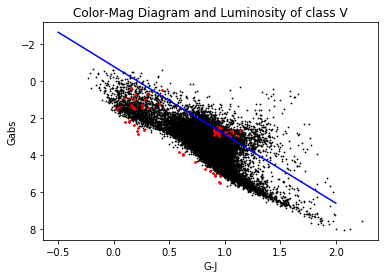

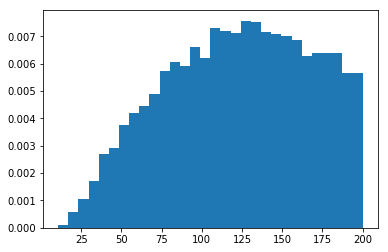

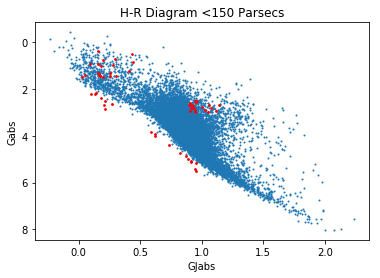

There are:  19641 Stars being used here


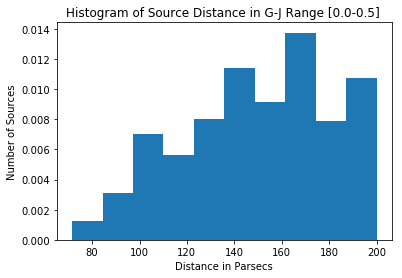

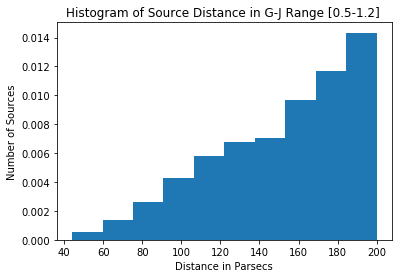

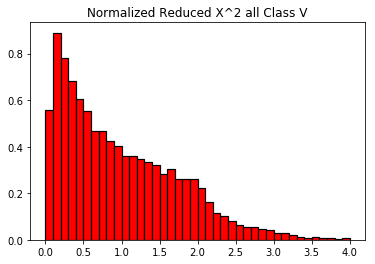

Mean Reduced X^2 value:  1.06249544986 
Standard Deviation:  1.66983243613
Number of Sources:  19641


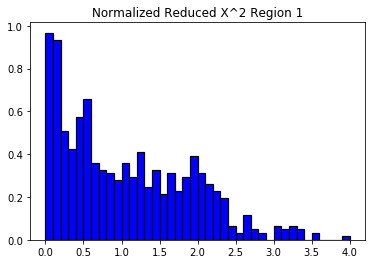

Mean Reduced X^2 value:  1.42927520931 
Standard Deviation:  5.65782313524
Number of Sources:  623 



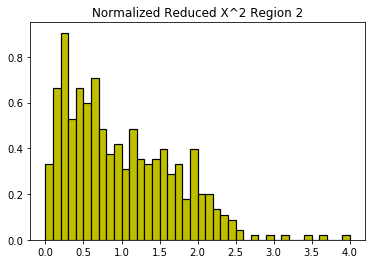

Mean Reduced X^2 value:  1.35224134403 
Standard Deviation:  3.52405334302
Number of Sources:  465 



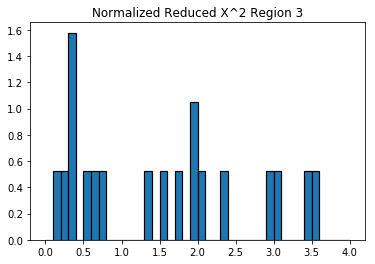

Mean Reduced X^2 value:  1.83628248281 
Standrd Deviation:  1.65386978369
Number of Sources:  20


C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


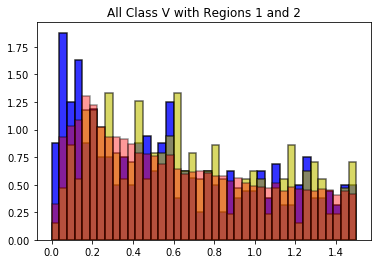

In [51]:
from scipy import stats
RA = t['RAJ2000']
BestFit = np.array(BestFit)
DEC = t['DEJ2000']
Gabs = []
GJabs = []
# First Region represents the G-J range of [0.0-0.5]
# Second Region represents the G-J range of [0.5-1.2]
# Each RA and DEC arrays correspond to each region based on the _"first" or _"second" notation
RA_first = []
DEC_first = []
temp_first = []
RA_second = []
DEC_second = []
temp_second = []
GJ1st = []
G1st = []
GJ2nd = []
G2nd = []
dist_1st = []
dist_2nd = []
# Arrays for sources below Main Sequence Line
RA_below = []
DEC_below = []
G_below = []
GJ_below = []
dist_below = []
temp_below = []
ClassVChi = []
Chi1st = []
Chi2nd = []
ChiBelow = []
nanChi = []
# Defines a rough estimate of the bottom of the Main Sequence Line. 
xrange = np.linspace(-0.5,2.0)
yvalue = xrange*3.7 -0.8
plt.plot(xrange,yvalue,c='b')
count = 0
all_dists = []
region1count = 0
region2count = 0
totalcount = 0
Tdiff = []
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            count = count + 1
            Gvalue = AbsGmag[i]
            GJvalue = AbsGmag[i]-AbsJmag[i]
            Gabs.append(Gvalue)
            GJabs.append(GJvalue)
            all_dists.append(dist[i])
            totalcount = totalcount + 1
            ClassVChi.append(BestFit[i,0])
            Tdiff.append(np.sqrt((Teff[i]-BestFit[i,1])**2.0))
            if(GJvalue >= 0.0 and GJvalue < 0.5):
                if(Gvalue >= 0.0 and Gvalue <= 1.5):
                    RA_first.append(RA[i])
                    DEC_first.append(DEC[i])
                    temp_first.append(Teff[i])
                    G1st.append(Gvalue)
                    GJ1st.append(GJvalue)
                    dist_1st.append(dist[i])
                    Chi1st.append(BestFit[i,0])
                    region1count = region1count + 1
                    
            if(0.9 <= GJvalue <= 1.2):
                if(2.5 <= Gvalue <= 3.0):
                    RA_second.append(RA[i])
                    DEC_second.append(DEC[i])
                    temp_second.append(Teff[i])
                    G2nd.append(Gvalue)
                    GJ2nd.append(GJvalue)
                    dist_2nd.append(dist[i])
                    Chi2nd.append(BestFit[i,0])
                    region2count = region2count + 1
            if(0.1 <= GJvalue <= 1.0):
                if(Gvalue > GJvalue*3.7+1.6):
                    RA_below.append(RA[i])
                    DEC_below.append(DEC[i])
                    G_below.append(Gvalue)
                    GJ_below.append(GJvalue)
                    dist_below.append(dist[i])
                    temp_below.append(Teff[i])
                    ChiBelow.append(BestFit[i,0])
            #else:
                #nanChi.append(all_RedChi[i])
#              if(0.2 <= GJvalue <= 0.5):
#                  if(Gvalue/GJvalue < 3.7):
#                      RA_below.append(RA[i])
#                      DEC_below.append(DEC[i])
#                      G_below.append(Gvalue)
#                      GJ_below.append(GJvalue)
#                      dist_below.append(dist[i])
#                      temp_below.append(Teff[i])
                
plt.title('Color-Mag Diagram and Luminosity of class V')
plt.xlabel('G-J')
plt.ylabel('Gabs')
plt.gca().invert_yaxis()
plt.scatter(GJabs,Gabs,s=0.6,c='k')
meanTempFirst = np.mean(temp_first)
meanTempSecond = np.mean(temp_second)

Gabs100 = []
GJabs100 = []
GChi = []
GJChi = []

print('Mean Effective Temperature in G-J Range 0.0-0.5: ', meanTempFirst, '\nNumber of Sources: ', len(RA_first), '\n')


print('Mean Effective Temperature in G-J Range 0.5-1.2: ', meanTempSecond, '\nNumber of Sources: ', len(RA_second), '\n')
print('     G-J [0.0-0.5]                           G-J [0.5-1.2]\n')
print('    RA                 DEC         DIST      ReducedChisq               RA                DEC         DIST      RedChiSQ')

G_1st = []
GJ_1st = []
dist1 = []
G_2nd = []
GJ_2nd = []
dist2 = []
for j in range(0,20):
    
    print(RA_first[j], '   ',DEC_first[j], '   ',dist_1st[j],'   ',Chi1st[j], '        ',RA_second[j], '   ',DEC_second[j], '   ',dist_2nd[j],'   ',Chi2nd[j])
    G_1st.append(G1st[j])
    GJ_1st.append(GJ1st[j])
    G_2nd.append(G2nd[j])
    GJ_2nd.append(GJ2nd[j])
    dist1.append(dist_1st[j])
    dist2.append(dist_2nd[j])
distBelow = []
print('\n \nAll Source below Theoretical Main Sequence Line (blue)\n')
print('    RA                 DEC         DIST      Reduced ChiSq')
for j in range(0,len(RA_below)):
    
    print(RA_below[j], '   ',DEC_below[j], '   ',dist_below[j],'   ',ChiBelow[j])
    distBelow.append(dist_below[j])
#     G_1st.append(G1st[j])
#     GJ_1st.append(GJ1st[j])
#     G_2nd.append(G2nd[j])
#     GJ_2nd.append(GJ2nd[j])
plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')
plt.show()


classV = []
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            classV.append(dist[i])
pltall=plt.hist(classV,bins=30,normed=True)
plt.show()
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            if(dist[i] < 150.0):
                Gvalue = AbsGmag[i]
                GJvalue = AbsGmag[i]-AbsJmag[i]
                Gabs100.append(Gvalue)
                GJabs100.append(GJvalue)
                
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            if(BestFit[i,0] < 0.5):
                Gvalue = AbsGmag[i]
                GJvalue = AbsGmag[i]-AbsJmag[i]
                GChi.append(Gvalue)
                GJChi.append(GJvalue)

# plt.title('Red X^2')
# plt.scatter(GJChi,GChi,s=2.0)
# plt.gca().invert_yaxis()
# plt.show()

plt.title('H-R Diagram <150 Parsecs')
plt.xlabel('GJabs')
plt.ylabel('Gabs')
plt.scatter(GJabs100,Gabs100,s=1.0)
plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')

plt.gca().invert_yaxis()
plt.show()
G_Chi = []
GJ_Chi = []
print('There are: ',count, 'Stars being used here')
#print(len(all_RedChi))
averageRedChi = []

# plt.title('H-R With Reduced Chi Sq <10.0')
# plt.xlabel('GJabs')
# plt.ylabel('Gabs')
# plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
# plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
# plt.scatter(GJ_below,G_below,s=3.0,c='r')
# plt.scatter(GJ_Chi,G_Chi,s=2.0)
# plt.gca().invert_yaxis()
# plt.show()

plt.title('Histogram of Source Distance in G-J Range [0.0-0.5] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist1st=plt.hist(dist_1st,normed=True)
plt.show()
plt.title('Histogram of Source Distance in G-J Range [0.5-1.2] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist2nd=plt.hist(dist_2nd,normed=True)
plt.show()

# Reduced X^2 Normalized Histograms
plt.title('Normalized Reduced X^2 all Class V')
plt.hist(ClassVChi,bins=40,range=[0,4],normed=True,color='r',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(ClassVChi),'\nStandard Deviation: ',np.std(ClassVChi))
print('Number of Sources: ', count)
plt.title('Normalized Reduced X^2 Region 1')
plt.hist(Chi1st,bins=40,range=[0,4],normed=True,color='b',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(Chi1st),'\nStandard Deviation: ',np.std(Chi1st))
print('Number of Sources: ', len(RA_first), '\n')
plt.title('Normalized Reduced X^2 Region 2')
plt.hist(Chi2nd,bins=40,range=[0,4],normed=True,color='y',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(Chi2nd),'\nStandard Deviation: ',np.std(Chi2nd))
print('Number of Sources: ', len(RA_second), '\n')
plt.title('Normalized Reduced X^2 Region 3')
plt.hist(ChiBelow,bins=40,range=[0,4],normed=True,edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(ChiBelow),'\nStandrd Deviation: ',np.std(ChiBelow))
print('Number of Sources: ', len(RA_below))
#print(stats.mode(ClassVChi))
plt.title('All Class V with Regions 1 and 2')

plt.hist(Chi1st,bins=40,range=[0,1.5],normed=True,edgecolor='black',linewidth=1.5,alpha=0.8,color='b')
plt.hist(Chi2nd,bins=40,range=[0,1.5],normed=True,edgecolor='black',linewidth=1.5,alpha=0.6,color='y')
plt.hist(ClassVChi,bins=40,range=[0,1.5],normed=True,edgecolor='black',linewidth=1.5,alpha=0.4,color='r')
plt.legend(loc='upper right')
plt.show()

In [131]:
len(spectralTypeRange)

18

C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


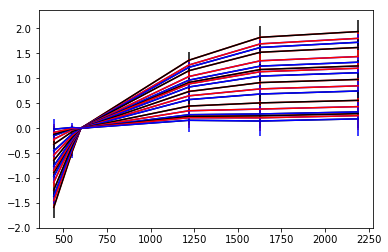

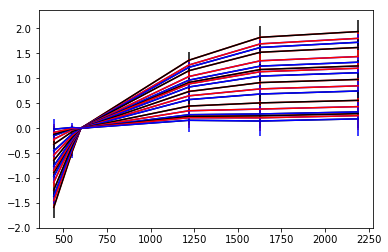

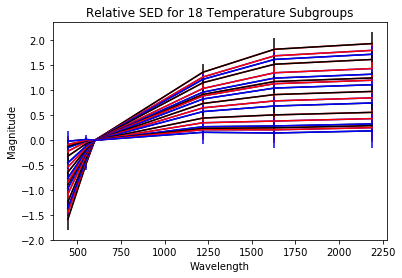

Mean STD for Spectral subgroups          Mean STD for color subgroups
Bmag:  0.127199226406                     0.220722349561
Vmag:  0.0683971417086                     0.105768607559
Jmag:  0.128971340162                     0.0855961813677
Hmag:  0.166375763544                     0.0909650359301
Kmag:  0.178190401904                     0.0724623807518

StanDev of STD for Spectral subgroups          StanDev of STD for color subgroups
Bmag:  0.0392214592625                     0.22326999183
Vmag:  0.0355836339648                     0.0873549618058
Jmag:  0.0403453222352                     0.0532561369697
Hmag:  0.0537445663824                     0.0424305110411
Kmag:  0.0646603114881                     0.00737106176617


In [132]:
totalRelMags_spec = np.array([totalRelB_spec,totalRelV_spec,totalRelG_spec,totalRelJ_spec,totalRelH_spec,totalRelK_spec])
errors = np.array([Bstd_spec,Vstd_spec,Gstd_spec,Jstd_spec,Hstd_spec,Kstd_spec])
fig, ax = plt.subplots()
ax.set_color_cycle(['red', 'black', 'blue'])
for i in range(len(spectralTypeRange)):
    plt.plot(EffWave,totalRelMags_spec[:,i])
    plt.errorbar(EffWave,totalRelMags_spec[:,i],errors[:,i])
    #plt.legend(["Mean Temp: "], [totalTemp[i]])
plt.title('Relative SED for 18 Temperature Subgroups') 
plt.xlabel('Wavelength')
plt.ylabel('Magnitude')
plt.show()
 

print('Mean STD for Spectral subgroups          Mean STD for color subgroups')       
print('Bmag: ',np.mean(Bstd_spec),'                   ',np.mean(Bstd))
print('Vmag: ',np.mean(Vstd_spec),'                   ',np.mean(Vstd))
print('Jmag: ',np.mean(Jstd_spec),'                   ',np.mean(Jstd))
print('Hmag: ',np.mean(Hstd_spec),'                   ',np.mean(Hstd))
print('Kmag: ',np.mean(Kstd_spec),'                   ',np.mean(Kstd))
    
print('\nStanDev of STD for Spectral subgroups          StanDev of STD for color subgroups')
print('Bmag: ',np.std(Bstd_spec),'                   ',np.std(Bstd))
print('Vmag: ',np.std(Vstd_spec),'                   ',np.std(Vstd))
print('Jmag: ',np.std(Jstd_spec),'                   ',np.std(Jstd))
print('Hmag: ',np.std(Hstd_spec),'                   ',np.std(Hstd))
print('Kmag: ',np.std(Kstd_spec),'                   ',np.std(Kstd))


In [62]:
import random
#numbers = [ int(x) for x in numbers ]
GiantSample = np.floor(np.linspace(0,len(GiantStars),len(GiantStars)))
GiantSample = [ int(x) for x in GiantSample]
print(GiantSample[0:30])
a = [1,2]
B = [3,4,5,6,7]
print(B[a[1]])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
5


In [434]:
#print(GiantMags[3]-GiantMags[2])
C = np.linspace(1.79,2.1577,8)
print(C[2]-C[1])

0.0525285714286


C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


-1.38231277466
-1.44348071172


C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


-1.51505621364
-1.5795954265


C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


-1.62510468793


C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


-1.68895078096
-1.74952085813


C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


-1.8084889094
******DONE******
1.79 - 2.06307692308  Range Completed
1.84252857143 - 2.11560549451  Range Completed
1.89505714286 - 2.16813406593  Range Completed
1.94758571429 - 2.22066263736  Range Completed
2.00011428571 - 2.27319120879  Range Completed
2.05264285714 - 2.32571978022  Range Completed
2.10517142857 - 2.37824835165  Range Completed
2.1577 - 2.43077692308  Range Completed
Finished all 13 Templates


C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


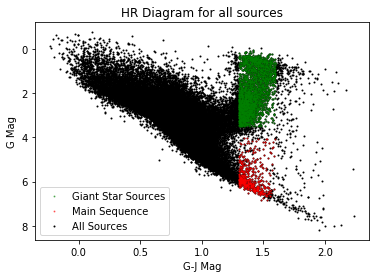

Number of stars in Main Sequence Region:  491 
Number of stars in Giant Branch:  486
Percentage of Stars in Giant branch:  49.744114636642784%

 2451
1.97064356697
0.110168105738
Giant
2.02342863833
0.133765336511


C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [436]:
import random
#GiantMags = np.linspace(1.3384615384615381,2.157692307692307,10)
GiantMags = np.linspace(1.79,2.1577,8)
#GiantMags = np.linspace(1.4,2.157692307692307,7)
count_giant = 0
count_V = 0
G_giant = []
GJ_giant = []
G_V = []
GJ_V = []
#xrange = np.linspace(-0.5,2.0)
#yvalue = xrange*3.7 -0.8
#plt.plot(xrange,yvalue,c='b')
# for i in range(0,len(Teff)):
#     if(Kmag.mask[i] == False and Hmag.mask[i] == False and Vmag.mask[i] == False):
        
#         if(SpTypeN[i] != 5.0 and Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
#             count = count + 1
#             Gvalue = AbsGmag[i]
#             GJvalue = AbsGmag[i]-AbsJmag[i]
#             G.append(Gvalue)
#             GJ.append(GJvalue)
#             if(GJvalue >=1.3 and GJvalue <= 1.5):
                
            #all_dist.append(dist[i])



totalRelB_V = ([])
totalRelV_V = ([])
totalRelK_V = ([])
totalRelH_V = ([])
totalRelJ_V = ([])
totalRelG_V = ([])

totBstd_giant = []
totVstd_giant = []
totKstd_giant = []
totHstd_giant = []
totJstd_giant = []
totGstd_giant = []

Bstd_V = []
Vstd_V = []
Kstd_V = []
Hstd_V = []
Jstd_V = []
Gstd_V = []

GKvals_giant = []
giant_temps = []
GKvals_giant = []
#GKvals_reg = []

GKvals_V = []
V_temps = []
GKvals_V = []
GKvals_giant = []
all_diffB_giant = []
all_diffB_std_giant = []
GiantStars = []
TemplateMagValues = []
giant_GK = []
GmagV_giant = []
VmagV_giant = []
KmagV_giant = []
HmagV_giant = []
JmagV_giant = []
BmagV_giant = []
totBmag_giant = []
totVmag_giant = []
totGmag_giant = []
totHmag_giant = []
totJmag_giant = []
totKmag_giant = []
allGJ = []
allG = []
for x in range(len(Teff)):
    GJval = (AbsGmag[x]-AbsJmag[x])
    Gval = AbsGmag[x]
    allGJ.append(GJval)
    allG.append(Gval)
    
    if(GJval >= 1.3 and GJval < 1.6 and Gval >= 0.0 and Gval < 3.5):
        GK = (AbsGmag[x]-AbsKmag[x])
        GiantStars.append(Teff[x])
        GKvals_giant.append(GK)
        GJ_giant.append(GJval)
        G_giant.append(Gval)
        #if(Gmag.mask[x] == False):
        GmagV_giant.append(AbsGmag[x]-AbsGmag[x])
        #if(Vmag.mask[x] == False and Gmag.mask[x] == False):
        VmagV_giant.append(AbsGmag[x]-AbsVmag[x])
        #if(Kmag.mask[x] == False and Gmag.mask[x] == False):
        KmagV_giant.append(AbsGmag[x]-AbsKmag[x])
        giant_GK.append(GK)
        #if(Hmag.mask[x] == False and Gmag.mask[x] == False):
        HmagV_giant.append(AbsGmag[x]-AbsHmag[x])
        #if(Jmag.mask[x] == False and Gmag.mask[x] == False):
        JmagV_giant.append(AbsGmag[x]-AbsJmag[x])
        #if(Bmag.mask[x] == False and Gmag.mask[x] == False):
        BmagV_giant.append(AbsGmag[x]-AbsBmag[x])
GiantSample = np.floor(np.linspace(0,len(GiantStars),len(GiantStars)))
GiantSample = [int(x) for x in GiantSample]
Sample = random.sample(GiantSample,566)
Giants = []
for m in GiantMags:
    giantcount = 0
    B = []
    V = []
    G = []
    J = []
    H = []
    K = []
    #if(m >= GiantMags[5] and m <= GiantMags[9]):
    #if(m == Mags[6]):
    if(m < 1000):
        for i in Sample:
            for j in range(len(GiantStars)):
                if(j == i):
                    #GKvals_giant.append(GK)
                    #if(m <= giant_GK[j] <= m + 0.0910256410256):
                    if(m <= giant_GK[j] <= m + 0.0525285714286):
                        giantcount = giantcount + 1
                        count_giant = count_giant +1 
                        B.append(BmagV_giant[j])
                        V.append(VmagV_giant[j])
                        K.append(KmagV_giant[j])
                        H.append(HmagV_giant[j])
                        J.append(JmagV_giant[j])
                        G.append(GmagV_giant[j])
        #print(len(B))
        Giants.append(giantcount)
        Baverage = np.nanmean(B)
        Vaverage = np.nanmean(V)
        Gaverage = np.nanmean(G)
        Haverage = np.nanmean(H)
        Javerage = np.nanmean(J)
        Kaverage = np.nanmean(K)
        print(Baverage)
        totBmag_giant.append(Baverage)
        totVmag_giant.append(Vaverage)
        totGmag_giant.append(Gaverage)
        totJmag_giant.append(Javerage)
        totHmag_giant.append(Haverage)
        totKmag_giant.append(Kaverage)
        Bstd_giant = np.nanstd(B)      
        Vstd_giant = np.nanstd(V) 
        Gstd_giant = np.nanstd(G) 
        Jstd_giant = np.nanstd(J) 
        Hstd_giant = np.nanstd(H)
        Kstd_giant = np.nanstd(K)
        totBstd_giant.append(Bstd_giant)
        totVstd_giant.append(Vstd_giant)
        totGstd_giant.append(Gstd_giant)
        totJstd_giant.append(Jstd_giant)
        totHstd_giant.append(Hstd_giant)
        totKstd_giant.append(Kstd_giant)

print('******DONE******')
MainStars = []
for i in GiantMags:
    starcount = 0
    #if(i >= GiantMags[5] and i <= GiantMags[9]):
    if(i <100000):
        sources = 0
        tempRange = []
        GmagV_V = []
        VmagV_V = []
        KmagV_V = []
        HmagV_V = []
        JmagV_V = []
        BmagV_V = []
        diffB_V = []
    #     GmagV_reg = []
    #     VmagV_reg = []
    #     KmagV_reg = []
    #     HmagV_reg = []
    #     JmagV_reg = []
    #     BmagV_reg = []
        for j in range(0,len(Teff)):
            GJval = (AbsGmag[j]-AbsJmag[j])
            Gval = AbsGmag[j]
            GK = (AbsGmag[j]-AbsKmag[j])
            
            if(Gval >= 4 and Gval < 7 and GJval >= 1.3 and GJval < 1.6):
            
                #if(Gval >= GJval*3.7 -0.8 and GJval >= 1.3 and GJval <=1.6 ):
                #if(i <= GK <= i + 0.0910256410256):
                if(i <= GK < i + 0.0525285714286):
                    starcount = starcount + 1
                    count_V = count_V + 1
                    G_V.append(Gval)
                    GJ_V.append(GJval)
                    giant_temps.append(Teff[j])
                    GKvals_V.append(GK)
                    #magRange.append(GK)
                    if(Gmag.mask[j] == False):
                        GmagV_V.append(AbsGmag[j]-AbsGmag[j])
                    if(Vmag.mask[j] == False and Gmag.mask[j] == False):
                        VmagV_V.append(AbsGmag[j]-AbsVmag[j])
                    if(Kmag.mask[j] == False and Gmag.mask[j] == False):
                        KmagV_V.append(AbsGmag[j]-AbsKmag[j])
                    if(Hmag.mask[j] == False and Gmag.mask[j] == False):
                        HmagV_V.append(AbsGmag[j]-AbsHmag[j])
                    if(Jmag.mask[j] == False and Gmag.mask[j] == False):
                        JmagV_V.append(AbsGmag[j]-AbsJmag[j])
                    if(Bmag.mask[j] == False and Gmag.mask[j] == False):
                        BmagV_V.append(AbsGmag[j]-AbsBmag[j])
                        #diffB_giant.append(AbsGmag[j]-AbsBmag[j])
                    sources = sources + 1
    #         if(SpTypeN[j] == 5.0 and Gval >= GJval*3.7 -0.4):
    #             GK = (AbsGmag[j]-AbsKmag[j])
    #             GKvals_reg.append(GK)
    #             G.append(Gval)
    #             GJ.append(GJval)
    #             if(i <= GK < i + 0.27307692307692305):
    #             #if(i <= GK < i+0.25):
    #                 #magRange.append(GK)
    #                 if(Gmag.mask[j] == False):
    #                     GmagV_reg.append(AbsGmag[j]-AbsGmag[j])
    #                 if(Vmag.mask[j] == False and Gmag.mask[j] == False):
    #                     VmagV_reg.append(AbsGmag[j]-AbsVmag[j])
    #                 if(Kmag.mask[j] == False and Gmag.mask[j] == False):
    #                     KmagV_reg.append(AbsGmag[j]-AbsKmag[j])
    #                 if(Hmag.mask[j] == False and Gmag.mask[j] == False):
    #                     HmagV_reg.append(AbsGmag[j]-AbsHmag[j])
    #                 if(Jmag.mask[j] == False and Gmag.mask[j] == False):
    #                     JmagV_reg.append(AbsGmag[j]-AbsJmag[j])
    #                 if(Bmag.mask[j] == False and Gmag.mask[j] == False):
    #                     BmagV_reg.append(AbsGmag[j]-AbsBmag[j])
    #                     #diffB_giant.append(AbsGmag[j]-AbsBmag[j])
    #                 sources = sources + 1
        MainStars.append(starcount)
        MeanGmag_V = np.nanmean(GmagV_V)
        MeanVmag_V = np.nanmean(VmagV_V)
        MeanHmag_V = np.nanmean(HmagV_V)
        MeanJmag_V = np.nanmean(JmagV_V)
        MeanKmag_V = np.nanmean(KmagV_V)
        MeanBmag_V = np.nanmean(BmagV_V)
        #all_diffB_giant.append(np.mean(diffB_giant))
        #all_diffB_std_giant.append(np.std(diffB_giant))
        Bstd_V.append(np.nanstd(BmagV_V))
        Vstd_V.append(np.nanstd(VmagV_V))
        Hstd_V.append(np.nanstd(HmagV_V))
        Jstd_V.append(np.nanstd(JmagV_V))
        Kstd_V.append(np.nanstd(KmagV_V))
        Gstd_V.append(np.nanstd(GmagV_V))
        totalRelB_V.append(MeanBmag_V)
        totalRelG_V.append(MeanGmag_V)
        totalRelV_V.append(MeanVmag_V)
        totalRelH_V.append(MeanHmag_V)
        totalRelK_V.append(MeanKmag_V)
        totalRelJ_V.append(MeanJmag_V)

    
        print(i,'-',i+.27307692307692305,' Range Completed')
        

print('Finished all',len(Mags),'Templates')
plt.title('HR Diagram for all sources')
plt.xlabel('G-J Mag')
plt.ylabel('G Mag')
plt.gca().invert_yaxis()
All_Stars = plt.scatter(allGJ,allG,s=1.0,c='k')
Giant_Stars = plt.scatter(GJ_giant,G_giant,s=1.0,c='g',alpha=0.5)
MainSequence_Stars = plt.scatter(GJ_V,G_V,s=1.0,c='r',alpha=0.5)
plt.legend([Giant_Stars, MainSequence_Stars, All_Stars],['Giant Star Sources','Main Sequence','All Sources'])
#plt.plot(np.linspace(1.7,1.7),np.linspace(-1,8.3))
#plt.plot(np.linspace(1.58,1.58),np.linspace(-1,8.3))
#plt.plot(np.linspace(1.27,1.27),np.linspace(-1,8.3))
#plt.plot(np.linspace(0.9,0.9),np.linspace(-1,8.3))
plt.show()

print('Number of stars in Main Sequence Region: ', count_V,'\nNumber of stars in Giant Branch: ',count_giant)
percentGiant = (count_giant/(count_giant + count_V))*100.0
print('Percentage of Stars in Giant branch: ', str(percentGiant) +'%')
print('\n',len(GiantStars))
print(np.nanmean(GKvals_V))
print(np.nanstd(GKvals_V))
print('Giant')
print(np.nanmean(GKvals_giant))
print(np.nanstd(GKvals_giant))

In [437]:
#print(totBmag_giant)
print(Mags[6:10])
A = np.linspace(1.3384615384615381,2.157692307692307,10)
print(A)
print(A[1]-A[0])
print(Giants)
print(MainStars)


[1.3384615384615381, 1.6115384615384611, 1.8846153846153841, 2.157692307692307]
[ 1.33846154  1.42948718  1.52051282  1.61153846  1.7025641   1.79358974
  1.88461538  1.97564103  2.06666667  2.15769231]
0.0910256410256
[16, 52, 89, 89, 86, 61, 48, 45]
[49, 103, 87, 84, 42, 47, 43, 36]


In [104]:
print((totalRelB_V))
print((totBstd_giant))

[-1.130000114440918, -1.3675077328315148, -1.6232211909190146, -1.8983797785602039]
[0.0, 0.0, 0.0, 0.0]


In [187]:
import random

A = [1,2,3,4]
print(np.random.choice(A,9))
print(len(BestFit_giant),len(Teff))

[4 4 3 4 3 2 2 4 2]
48233 50093


In [439]:
# Calculates the Chi squared value for every star based off of the color subgroups. 


def ChiSq(theory,data,Uncert):
    value = ((theory-data)/Uncert)**(2.0)
    return value
All_Chi_Values = []
Chi_minB = []
Chi_minV = []
Chi_minH = []
Chi_minK = []
Chi_minJ = []
finalB = []
finalV = []
finalJ = []
finalK = []
finalH = []
BestFit_V = []
BestFit_giant = []
for i in range(0,len(Teff)):
    #if(SpTypeN[i] in SpV and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False and Bmag.mask[i] == False):
    GJval = (AbsGmag[i]-AbsJmag[i])
    Gval = AbsGmag[i]
    #if(GJval >= 1.3 and GJval <= 1.6):
    if(GJval >= 1.3 and GJval <= 1.6 and Gval >= 0.0 and Gval <= 3.5):
    #if(Gval >= 4 and Gval < 7 and GJval >= 1.3 and GJval < 1.6):
    #if(GJval < 100000):
        RedChi_V = []
        RedChi_giant = []
        nan = 0
        for j in range(len(totBmag_giant)):
            
            if(Vmag.mask[i] == False and Gmag.mask[i] == False):
                data = (AbsGmag[i]-AbsVmag[i])
                currentV_V = ChiSq(totalRelV_V[j],data,Vstd_V[j])
                currentV_giant = ChiSq(totVmag_giant[j],data,totVstd_giant[j])
    #             ChiV.append([currentV,totalTemp[j]])
    #             np.append(ChiV_np,ChiV)
            if(Kmag.mask[i] == False and Gmag.mask[i] == False):
                data = (AbsGmag[i]-AbsKmag[i])
                currentK_V = ChiSq(totalRelK_V[j],data,Kstd_V[j])
                currentK_giant = ChiSq(totKmag_giant[j],data,totKstd_giant[j])
    #             ChiK.append([currentK,totalTemp[j]])
    #             np.append(ChiK_np,ChiK)
            if(Hmag.mask[i] == False and Gmag.mask[i] == False):
                data = (AbsGmag[i]-AbsHmag[i])
                currentH_V = ChiSq(totalRelH_V[j],data,Hstd_V[j])
                currentH_giant = ChiSq(totHmag_giant[j],data,totHstd_giant[j])
    #             ChiH.append([currentH,totalTemp[j]])
    #             np.append(ChiH_np,ChiH)
            if(Jmag.mask[i] == False and Gmag.mask[i] == False):
                data = (AbsGmag[i]-AbsJmag[i])
                currentJ_V = (ChiSq(totalRelJ_V[j],data,Jstd_V[j]))
                currentJ_giant = (ChiSq(totJmag_giant[j],data,totJstd_giant[j]))
    #             ChiJ.append([currentJ,totalTemp[j]])
    #             np.append(ChiJ_np,ChiJ)
            if(Bmag.mask[i] == False and Gmag.mask[i] == False):
                data = (AbsGmag[i]-AbsBmag[i])
                currentB_V = (ChiSq(totalRelB_V[j],data,Bstd_V[j]))
                currentB_giant = (ChiSq(totBmag_giant[j],data,totBstd_giant[j]))
    #             ChiB.append([currentB,totalTemp[j]])
    #             np.append(ChiB_np,ChiB)
            RedChi_V.append([(currentV_V+currentK_V+currentH_V+currentJ_V+currentB_V)/4,totalRelK_V[j]])
            RedChi_giant.append([(currentV_giant+currentK_giant+currentH_giant+currentJ_giant+currentB_giant)/4,totKmag_giant[j]])
        RedChi_V = np.array(RedChi_V)
        RedChi_giant = np.array(RedChi_giant)
        Min_V = np.nanmin(RedChi_V[:,0])
        Min_giant = np.nanmin(RedChi_giant[:,0])
        #print(nan)
        for x in range(len(RedChi_V)):
            if(Min_V in RedChi_V[x]):
                bestMag = RedChi_V[x,1]

        BestFit_V.append([Min_V,bestMag])
        for x in range(len(RedChi_giant)):
            if(Min_giant in RedChi_giant[x]):
                bestMag = RedChi_giant[x,1]
                #print('Im here')
        BestFit_giant.append([Min_giant,bestMag])
    
print('Finished fitting all Stars to the main sequence templates and Giants Templates')

Finished fitting all Stars to the main sequence templates and Giants Templates


In [443]:
#print((ClassV_Mags-Giant_Mags))
print(ClassVstd)

#print('\n',ClassV_Mags[2])


[[ 0.27116228  0.24819338  0.22370923  0.18235472  0.17134804  0.18609023
   0.15395759  0.12791112]
 [ 0.15471331  0.14353068  0.10672495  0.07315441  0.09338822  0.14237142
   0.08937636  0.06833196]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.06643675  0.05483106  0.0506238   0.04210837  0.03760825  0.02604674
   0.02822602  0.02449983]
 [ 0.0266951   0.02685007  0.03815503  0.02865392  0.03137641  0.03259589
   0.02960136  0.02912663]
 [ 0.01443304  0.01585343  0.01436786  0.01579783  0.0143178   0.016543
   0.01606263  0.01373113]]


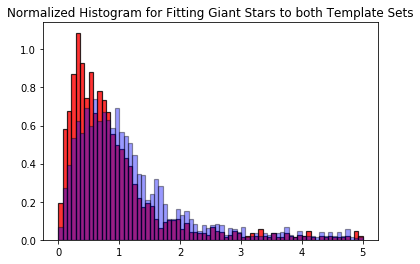

Mean X^2 value for Giant Fitting:  5.25109747038
Mean X^2 value for main sequence Fitting:  4.91915603999


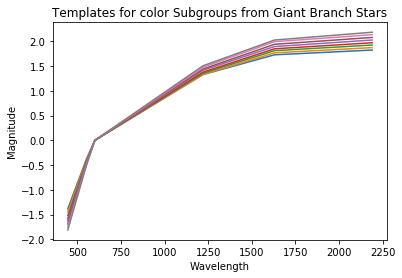

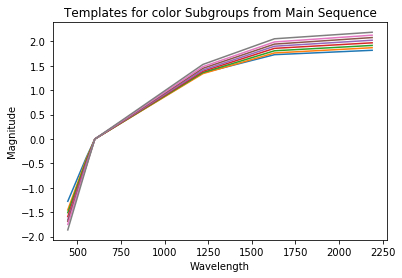

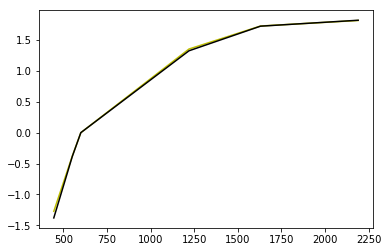

Total Number of Stars in Giant Template:  16 
Total Number of Stars in Main Sequence Template:  49 



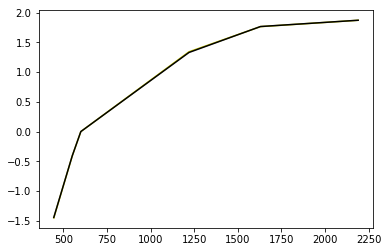

Total Number of Stars in Giant Template:  52 
Total Number of Stars in Main Sequence Template:  103 



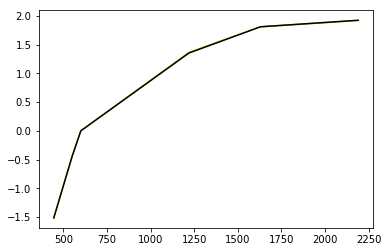

Total Number of Stars in Giant Template:  89 
Total Number of Stars in Main Sequence Template:  87 



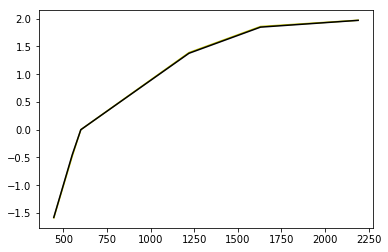

Total Number of Stars in Giant Template:  89 
Total Number of Stars in Main Sequence Template:  84 



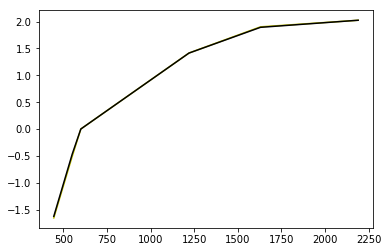

Total Number of Stars in Giant Template:  86 
Total Number of Stars in Main Sequence Template:  42 



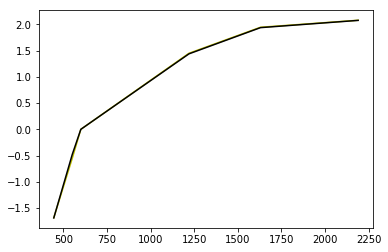

Total Number of Stars in Giant Template:  61 
Total Number of Stars in Main Sequence Template:  47 



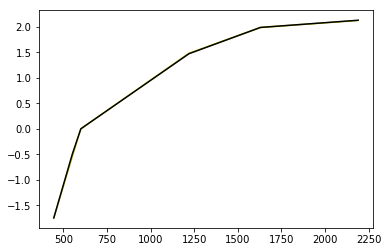

Total Number of Stars in Giant Template:  48 
Total Number of Stars in Main Sequence Template:  43 



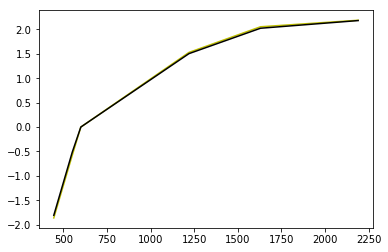

Total Number of Stars in Giant Template:  45 
Total Number of Stars in Main Sequence Template:  36 

Mean Color for Giant Templates          Mean Colors for Main Sequence Templates
Bmag:  -1.59906379537                     -1.59725578493
Vmag:  -0.453953191186                     -0.484722306596
Jmag:  1.40263367443                     1.41602197748
Hmag:  1.87492624478                     1.88188407217
Kmag:  2.00072213591                     2.00038891184


IndexError: too many indices for array

In [442]:
axes = plt.gca()
BestFit_V = np.array(BestFit_V)
BestFit_giant = np.array(BestFit_giant)
plt.title('Normalized Histogram for Fitting Giant Stars to both Template Sets')
plt.hist(BestFit_V[:,0],bins=70,normed=True,range=[0,5],color='r',edgecolor='black',linewidth=1.2,alpha=0.8)
plt.hist(BestFit_giant[:,0],bins=70,normed=True,range=[0,5],color='b',edgecolor='black',linewidth=1.2,alpha=0.4)
plt.show()
print('Mean X^2 value for Giant Fitting: ',np.mean(BestFit_giant[:,0]))
print('Mean X^2 value for main sequence Fitting: ',np.mean(BestFit_V[:,0]))

ClassV_Mags = ([totalRelB_V,totalRelV_V,totalRelG_V,totalRelJ_V,totalRelH_V,totalRelK_V])
Giant_Mags = ([totBmag_giant,totVmag_giant,totGmag_giant,totJmag_giant,totHmag_giant,totKmag_giant])
ClassVstd = ([Bstd_V,Vstd_V,Gstd_V,Jstd_V,Hstd_V,Kstd_V])
Giant_stds = ([Bstd_giant,Vstd_giant,Gstd_giant,Jstd_giant,Hstd_giant,Kstd_giant])
ClassV_Mags = np.array(ClassV_Mags)
Giant_Mags = np.array(Giant_Mags)
ClassVstd = np.array(ClassVstd)
Giant_stds = np.array(Giant_stds)
#for i in range(0,6):
plt.plot(EffWave,Giant_Mags)
#plt.errorbar(EffWave,Giant_Mags,Giant_stds)
    #plt.legend(["Mean Temp: "], [totalTemp[i]])
plt.title('Templates for color Subgroups from Giant Branch Stars') 
plt.xlabel('Wavelength')
plt.ylabel('Magnitude')
plt.show()

#for i in range(0,6):
plt.plot(EffWave,ClassV_Mags)
#plt.errorbar(EffWave,ClassV_Mags,yerr=ClassVstd)
    #plt.legend(["Mean Temp: "], [totalTemp[i]])
plt.title('Templates for color Subgroups from Main Sequence') 
plt.xlabel('Wavelength')
plt.ylabel('Magnitude')
plt.show()

for i in range(len(Giants)):
    plt.plot(EffWave,ClassV_Mags[:,i],c='y')
    plt.plot(EffWave,Giant_Mags[:,i],c='k')
    #plt.errorbar(EffWave,Giant_Mags[:,i],yerr = Giant_stds[:,i])
    plt.show()
    print('Total Number of Stars in Giant Template: ',Giants[i],'\nTotal Number of Stars in Main Sequence Template: ',MainStars[i],'\n')

ClassV_Mags = np.array(ClassV_Mags)
Giant_Mags = np.array(Giant_Mags)
ClassVstd = np.array(ClassVstd)
Giant_stds = np.array(Giant_stds)

print('Mean Color for Giant Templates          Mean Colors for Main Sequence Templates')       
print('Bmag: ',np.mean(totBmag_giant),'                   ',np.mean(totalRelB_V))
print('Vmag: ',np.mean(totVmag_giant),'                   ',np.mean(totalRelV_V))
print('Jmag: ',np.mean(totJmag_giant),'                   ',np.mean(totalRelJ_V))
print('Hmag: ',np.mean(totHmag_giant),'                   ',np.mean(totalRelH_V))
print('Kmag: ',np.mean(totKmag_giant),'                   ',np.mean(totalRelK_V))
    

Diff_Colors = np.sqrt((ClassV_Mags - Giant_Mags)**2)
Diff_Colors = np.array(Diff_Colors)
Diff1 = np.mean(Diff_Colors[:,0])
Diff2 = np.mean(Diff_Colors[:,1])
Diff3 = np.mean(Diff_Colors[:,3])
Diff4 = np.mean(Diff_Colors[:,4])
Diff5 = np.mean(Diff_Colors[:,5])
Diffs = [Diff1,Diff2,Diff3,Diff4,Diff5]

Diff_std1_g = np.sum(Giant_stds[:,0])
Diff_std2_g = np.sum(Giant_stds[:,1])
Diff_std3_g = np.sum(Giant_stds[:,3])
Diff_std4_g = np.sum(Giant_stds[:,4])
Diff_std5_g = np.sum(Giant_stds[:,5])
Diff_sigmas_g = [Diff_std1_g,Diff_std2_g,Diff_std3_g,Diff_std4_g,Diff_std5_g]
Diff_std1 = np.sum(ClassVstd[:,0])
Diff_std2 = np.sum(ClassVstd[:,1])
Diff_std3 = np.sum(ClassVstd[:,3])
Diff_std4 = np.sum(ClassVstd[:,4])
Diff_std5 = np.sum(ClassVstd[:,5])
Diff_sigmas = [Diff_std1,Diff_std2,Diff_std3,Diff_std4,Diff_std5]
print(np.sum(Diff_Colors1[0]),Diff_std1)
Bands = ['Bmag','Vmag','Jmag','Hmag','Kmag']
print('Difference in Colors with Standard Deviation :\n          Difference        Stdev from Main Sequence        Stdev from Giant Branch')
for i in range(len(Diff_Colors[:,0])-1):
    print(Bands[i],': ', Diffs[i],'    ', Diff_sigmas[i],'             ',Diff_sigmas_g[i], '\n')

# for j in range(len(ClassV_Mags[:,0])):
#     BDiff = ClassV_Mags[i,0] - Giant_Mags[i,0]
#     VDiff = ClassV_Mags[i,1] - Giant_Mags[i,1]
#     GDiff = ClassV_Mags[i,2] - Giant_Mags[i,2]
#     JDiff = ClassV_Mags[i,3] - Giant_Mags[i,3]
#     HDiff = ClassV_Mags[i,4] - Giant_Mags[i,4]


In [36]:
for i in range(0,len(Teff)):
    GJval = (AbsGmag[i]-AbsJmag[i])
    if(GJval >= 1.3 and GJval <= 1.6):
        #if(SpTypeN[i] in SpV and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False and Bmag.mask[i] == False):
        RedChi_giant = []
        nan = 0
        for j in range(len(totMagB_giant)):
            if(str(totalRelV_giant[j]) == 'nan'):
                nan = nan + 1
            if(Vmag.mask[i] == False and Gmag.mask[i] == False):
                data = (AbsGmag[i]-AbsVmag[i])
                
                currentV_giant = ChiSq(totVmag_giant[j],data,Vstd_giant[j])
    #             ChiV.append([currentV,totalTemp[j]])
    #             np.append(ChiV_np,ChiV)
            if(Kmag.mask[i] == False and Gmag.mask[i] == False):
                data = (AbsGmag[i]-AbsKmag[i])
                
                currentK_giant = ChiSq(totKmag_giant[j],data,Kstd_giant[j])
    #             ChiK.append([currentK,totalTemp[j]])
    #             np.append(ChiK_np,ChiK)
            if(Hmag.mask[i] == False and Gmag.mask[i] == False):
                data = (AbsGmag[i]-AbsHmag[i])
                
                currentH_giant = ChiSq(totHmag_giant[j],data,Hstd_giant[j])
    #             ChiH.append([currentH,totalTemp[j]])
    #             np.append(ChiH_np,ChiH)
            if(Jmag.mask[i] == False and Gmag.mask[i] == False):
                data = (AbsGmag[i]-AbsJmag[i])
                currentJ_V = (ChiSq(totalRelJ_V[j],data,Jstd_V[j]))
                currentJ_giant = (ChiSq(totJmag_giant[j],data,Jstd_giant[j]))
    #             ChiJ.append([currentJ,totalTemp[j]])
    #             np.append(ChiJ_np,ChiJ)
            if(Bmag.mask[i] == False and Gmag.mask[i] == False):
                data = (AbsGmag[i]-AbsBmag[i])
                currentB_V = (ChiSq(totalRelB_V[j],data,Bstd_V[j]))
                currentB_giant = (ChiSq(totBmag_giant[j],data,Bstd_giant[j]))
    #             ChiB.append([currentB,totalTemp[j]])
    #             np.append(ChiB_np,ChiB)
            RedChi_V.append([(currentV_V+currentK_V+currentH_V+currentJ_V+currentB_V)/4,totalRelK_V[j]])
            RedChi_giant.append([(currentV_giant+currentK_giant+currentH_giant+currentJ_giant+currentB_giant)/4,totKmag_giant[j]])
        RedChi_V = np.array(RedChi_V)
        RedChi_giant = np.array(RedChi_giant)
        Min_V = np.nanmin(RedChi_V[:,0])
        Min_giant = np.nanmin(RedChi_giant[:,0])
        print(nan)
        for x in range(len(RedChi_V)):
            if(Min_V in RedChi_V[x]):
                bestMag = RedChi_V[x,1]

        BestFit_V.append([Min_V,bestMag])
        for x in range(len(RedChi_giant)):
            if(Min_giant in RedChi_giant[x]):
                bestMag = RedChi_giant[x,1]
                print('Im here')
        BestFit_giant.append([Min_giant,bestMag])
    
print('Finished fitting all Stars to the main sequence templates and Giants Templates')

13


In [72]:
fits_giant = 

In [229]:

#all_the_mags = np.array([totalRelB_giant,totalRelV_giant,totalRelG_giant,totalRelJ_giant,totalRelH_giant,totalRelK_giant])
# for i in range(len(Mags)):
#     plt.plot(EffWave,all_the_mags[:,i])
#     #plt.legend(["Mean Temp: "], [totalTemp[i]])
# plt.title('Relative SED for Giant Region') 
# plt.xlabel('Wavelength')
# plt.ylabel('Magnitude')
# plt.show()

# all_the_mags = np.array([totalRelB_V,totalRelV_V,totalRelG_V,totalRelJ_V,totalRelH_V,totalRelK_V])
# for i in range(0,4):
#     plt.plot(EffWave,all_the_mags[:,i])
#     #plt.legend(["Mean Temp: "], [totalTemp[i]])
# plt.title('Relative SED for Main Sequence Region') 
# plt.xlabel('Wavelength')
# plt.ylabel('Magnitude')
# plt.show()

# for i in range(len(Mags)):
#     plt.plot(EffWave,totalRelMags[:,i])
#     #plt.errorbar(EffWave,totalRelMags[:,i],totalStdMags[:,i])
#     #plt.legend(["Mean Temp: "], [totalTemp[i]])
# plt.title('Relative SED for color (G-K) subgroups') 
# plt.xlabel('Wavelength')
# plt.ylabel('Magnitude')
# plt.show()

print('Mean STD for Giant subgroups          Mean STD for color subgroups')
print('Bmag: ',np.nanmean(Bstd_giant),'                   ',np.nanmean(Bstd_V))
print('Vmag: ',np.nanmean(Vstd_giant),'                   ',np.nanmean(Vstd_V))
print('Jmag: ',np.nanmean(Jstd_giant),'                   ',np.nanmean(Jstd_V))
print('Hmag: ',np.nanmean(Hstd_giant),'                   ',np.nanmean(Hstd_V))
print('Kmag: ',np.nanmean(Kstd_giant),'                   ',np.nanmean(Kstd_V))
    
print('\nStanDev of STD for Giant subgroups          StanDev of STD for color subgroups')
print('Bmag: ',np.nanstd(Bstd_giant),'                   ',np.nanstd(Bstd_V))
print('Vmag: ',np.nanstd(Vstd_giant),'                   ',np.nanstd(Vstd_V))
print('Jmag: ',np.nanstd(Jstd_giant),'                   ',np.nanstd(Jstd_V))
print('Hmag: ',np.nanstd(Hstd_giant),'                   ',np.nanstd(Hstd_V))
print('Kmag: ',np.nanstd(Kstd_giant),'                   ',np.nanstd(Kstd_V))

print('\nMean mag for Giant subgroups          Mean mag for color subgroups')
print('Bmag: ',np.nanmean(totBmag_giant),'                   ',np.nanmean(totalRelB_V))
print('Vmag: ',np.nanmean(totVmag_giant),'                   ',np.nanmean(totalRelV_V))
print('Jmag: ',np.nanmean(totJmag_giant),'                   ',np.nanmean(totalRelJ_V))
print('Hmag: ',np.nanmean(totHmag_giant),'                   ',np.nanmean(totalRelH_V))
print('Kmag: ',np.nanmean(totKmag_giant),'                   ',np.nanmean(totalRelK_V))
    

print('\nMean of G-B: ',np.std(all_diffB),'\nStandard Deviation of G-B: ',np.std(all_diffB_std) )

Mean STD for Giant subgroups          Mean STD for color subgroups
Bmag:  0.0968137367223                     0.143064851935
Vmag:  0.0455090370047                     0.0757996953778
Jmag:  0.0368545869189                     0.0302028392017
Hmag:  0.0477560702663                     0.0403010202633
Kmag:  0.0484059762223                     0.0400786353074

StanDev of STD for Giant subgroups          StanDev of STD for color subgroups
Bmag:  0.0                     0.0902899631344
Vmag:  0.0                     0.0490789603066
Jmag:  0.0                     0.0203970738627
Hmag:  0.0                     0.0267868987266
Kmag:  0.0                     0.0284743015692

Mean mag for Giant subgroups          Mean mag for color subgroups
Bmag:  -1.36591860313                     -1.50477720419
Vmag:  -0.380886040936                     -0.453461910253
Jmag:  1.40171529407                     1.46132728639
Hmag:  1.79828668214                     1.90557932875
Kmag:  1.90835700043          

8278


In [183]:
RA = t['RAJ2000']
BestFit_V = np.array(BestFit_V)
BestFit_giant = np.array(BestFit_giant)
DEC = t['DEJ2000']
Gabs = []
GJabs = []
# First Region represents the G-J range of [0.0-0.5]
# Second Region represents the G-J range of [0.5-1.2]
# Each RA and DEC arrays correspond to each region based on the _"first" or _"second" notation

GJzone = []
Gzone = []

dist_1st = []
dist_2nd = []
# Arrays for sources below Main Sequence Line

# Defines a rough estimate of the bottom of the Main Sequence Line. 
xrange = np.linspace(-0.5,2.0)
yvalue = xrange*3.7 -0.8
plt.plot(xrange,yvalue,c='b')
count = 0
all_dists = []
region1count = 0
region2count = 0
totalcount = 0

GV = []
GJV = []
allChiVals_V = []
allChiVals_giant = []
ChiVals_V = []
ChiVals_giant = []
for i in range(0,len(Teff)):
    if(Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            count = count + 1
            Gvalue = AbsGmag[i]
            GJvalue = AbsGmag[i]-AbsJmag[i]
            Gabs.append(Gvalue)
            GJabs.append(GJvalue)
            all_dists.append(dist[i])
            totalcount = totalcount + 1
            allChiVals_V.append(BestFit_V[i,0])
            allChiVals_giant.append(BestFit_giant[i,0])
            
            
            if(GJvalue >= 0.9 and GJvalue <= 1.71):
                Gzone.append(Gvalue)
                GJzone.append(GJvalue)
                dist_1st.append(dist[i])
                ChiVals_giant.append(BestFit_giant[i,0])
                ChiVals_V.append(BestFit_V[i,0])
                region1count = region1count + 1
                
plt.title('Color-Mag H-R Diagram of all Stars')
plt.xlabel('G-J')
plt.ylabel('Gabs')

plt.scatter(GJabs,Gabs,s=0.6,c='k')
plt.scatter(GJ_giant,G_giant,s=0.7,c='r')
for x in range(len(G_V)):
    if(GJ_V[x] >= 0.9 and GJ_V[x] <= 1.71):
        GV.append(G_V[x])
        GJV.append(GJ_V[x])
plt.scatter(GJV,GV,s=0.7,c='r')
plt.gca().invert_yaxis()
plt.show()

print('There are: ',count, 'Stars being used here')
#print(len(all_RedChi))



# Reduced X^2 Normalized Histograms
plt.title('Normalized Reduced X^2 all Stars Using Main Sequence Templates')
plt.hist(allChiVals_V,bins=40,normed=True,color='r',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(allChiVals_V),'\nStandard Deviation: ',np.std(allChiVals_V))
print('Number of Sources: ', count)

plt.title('Normalized Reduced X^2 all Stars  using Giant Star Templates')
plt.hist(allChiVals_giant,bins=40,range=[0,4],normed=True,color='r',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(allChiVals_giant),'\nStandard Deviation: ',np.std(allChiVals_giant))
print('Number of Sources: ', count)

plt.title('Normalized Reduced X^2 using class V star Templates between 0.9 - 1.7 G-J')
plt.hist(ChiVals_V,bins=40,normed=True,color='b',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(ChiVals_V),'\nStandard Deviation: ',np.std(ChiVals_V))

plt.title('Normalized Reduced X^2 using giant star Templates between 0.9 - 1.7 G-J')
plt.hist(ChiVals_giant,bins=40,range=[0,4],normed=True,color='b',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(ChiVals_giant),'\nStandard Deviation: ',np.std(ChiVals_giant))


# plt.title('All Class V with Regions 1 and 2')

# plt.hist(Chi1st,bins=40,range=[0,1.5],normed=True,edgecolor='black',linewidth=1.5,alpha=0.8,color='b')
# plt.hist(Chi2nd,bins=40,range=[0,1.5],normed=True,edgecolor='black',linewidth=1.5,alpha=0.6,color='y')
# plt.hist(ClassVChi,bins=40,range=[0,1.5],normed=True,edgecolor='black',linewidth=1.5,alpha=0.4,color='r')
# plt.legend(loc='upper right')
# plt.show()

IndexError: index 48234 is out of bounds for axis 0 with size 48233